# Tutorial: Compact Radio Source Unsupervised Classification

## Pre-requisites
We need to first install required python modules. Besides some addons modules, we will mainly use my TensorFlow-based module `sclassifier` (https://github.com/SKA-INAF/sclassifier), which contains a collection of various methods for source classification, from CNNs to autoencoders, etc.

### Module installation

In [1]:
###########################
###   CUSTOM MODULES
###########################
!pip install gdown
!pip install directory_tree

# - Required by pixplotml
!pip install glob2
!pip install iiif_downloader
!pip install pointgrid

###########################
##   SCLASSIFIER
###########################
!pip install -U sclassifier

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: dblatex 0.3.11py3 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dblatex or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.13.1-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a ve

DEPRECATION: dblatex 0.3.11py3 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dblatex or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.13.1-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://git

DEPRECATION: dblatex 0.3.11py3 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of dblatex or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: distro-info 0.23ubuntu1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: gpg 1.13.1-unknown has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of gpg or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://git

### Module Check
Let's first check that sclassifier module can be imported.

In [2]:
import sclassifier

2024-03-18 09:41:03 INFO - sclassifier v1.0.5 (2024-03-14)


### Project folders

In [1]:
import os
from pathlib import Path

def create_dir(dirname):
    print("Creating directory %s ..." % (dirname))
    path = Path(dirname)
    path.mkdir(parents=True, exist_ok=True)
    print("Run directory %s created successfully ..." % (dirname))  

# - Set project directory
topdir= os.getcwd()
print("topdir=%s" % (topdir))

# - Create run directories
datalist_dir= os.path.join(topdir, "datalists")
cae_dir= os.path.join(topdir, "cae")
cae_radio_dir= os.path.join(cae_dir, "radio")
cae_multiwavelength_dir= os.path.join(cae_dir, "multiwavelength")
cae_multiwavelength_train_dir= os.path.join(cae_multiwavelength_dir, "train")
datacheck_dir= os.path.join(topdir, "data_checks")
#umap_dir= os.path.join(topdir, "umap")
#cae_reco_dir= os.path.join(topdir, "cae_reco")
smorph_class_dir= os.path.join(topdir, "smorph_class")
pixplotml_dir= os.path.join(topdir, "pixplotml")

create_dir(datalist_dir)
create_dir(cae_dir)
create_dir(cae_radio_dir)
create_dir(cae_multiwavelength_dir)
create_dir(cae_multiwavelength_train_dir)
create_dir(datacheck_dir)
create_dir(smorph_class_dir)
#create_dir(umap_dir)
#create_dir(cae_reco_dir)

############################
##   DATASET URL
############################
dataset_name= "smgps-compact-source-dataset"
dataset_dir= os.path.join(topdir, dataset_name)
dataset_filelist_dir= os.path.join(dataset_dir, "filelists")
dataset_filename= 'dataset.tar.gz'
dataset_url= 'https://drive.google.com/uc?export=download&id=1IXue46zOFzxzsP9FXtrW7RjmGPv-xJ5p'

#####################################
##   PRE-TRAINED CAE MODELS URL
#####################################
# - CAE MULTI-WAVELENGTH
model_cae_multiwavelength_filename= 'cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200.tar.gz'
model_cae_multiwavelength_dir= "cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/"
model_cae_multiwavelength_url= 'https://drive.google.com/uc?export=download&id=1ug-NSSs3UHF4AXOE_cLfePSZUo_NZ-3f'
    
# - CAE RADIO
model_cae_radio_filename= 'cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100.tar.gz'
model_cae_radio_dir= "cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100/"
model_cae_radio_url= 'https://drive.google.com/uc?export=download&id=1v598NslPu4-nnFRGS4iV4ab7UHW--r7J'

#####################################
##   PRE-TRAINED CNN MODELS URL
#####################################
# - CNN source morphology classifier (radio data, 4 conv layers, nepochs100)
model_smorph_filename= 'cnn_conv4_rgz_imgsize64_nepochs100.tar.gz'
model_smorph_dir= "cnn_conv4_rgz_imgsize64_nepochs100/"
model_smorph_url= 'https://drive.google.com/uc?export=download&id=19BT_6zSiCVDoNkMenwJkNVmmge85TsW6'


topdir=/home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on
Creating directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists ...
Run directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists created successfully ...
Creating directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae ...
Run directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae created successfully ...
Creating directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio ...
Run directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio created successfully ...
Creating directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength ...
Run directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength created successfully ...
Creating directory /home/ri

### PixPlotML Installation
We will also install `pixplotml` (https://github.com/alexhock/pixplotml), a tool for latent space interactive inspection. We have forked it and made some minor modifications: https://github.com/simoneriggi/pixplotml. 

In [4]:
###########################
##   PIXPLOTML
###########################
# - Enter top directory
os.chdir(topdir)

# - Download or pull pixplotml
pixplot_url= "https://github.com/simoneriggi/pixplotml.git"

if os.path.isdir(pixplotml_dir):
    os.chdir(pixplotml_dir)
    print("Pulling latest pixplotml version from forked repo %s ..." % (pixplot_url))
    !git pull origin main
else:
    print("Downloading latest pixplotml version from forked repo %s ..." % (pixplot_url))
    !git clone {pixplot_url}
    !pip install -r pixplotml/pixplot_server/requirements.txt

# - Create pix plot directories
#pixplotml_vis_dir= os.path.join(topdir, "pixplotml_vis")
#print("Creating pixplotml directory %s for visualization scopes ..." % (pixplotml_vis_dir))
#create_dir(pixplotml_vis_dir)

Pulling latest pixplotml version from forked repo https://github.com/simoneriggi/pixplotml.git ...
From https://github.com/simoneriggi/pixplotml
 * branch            main       -> FETCH_HEAD
Already up to date.
Creating pixplotml directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/pixplotml_vis for visualization scopes ...
Creating directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/pixplotml_vis ...
Run directory /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/pixplotml_vis created successfully ...


## Dataset
The dataset for this tutorial contains radio + infrared images for 4319 compact radio sources from the SARAO MeerKAT GPS (SMGPS) survey. Only 79 sources are likely associated to known objects (HII, PN, YSO, Pulsar), the rest (4240) are unclassified. For each source, we provide multi-wavelength data (radio+IR), consisting of 10 images, each corresponding to a given frequency:

Chan 1-4: SMGPS, sub-bands 1+2+3, 4+5+6, 9+10+11, 12+13+14 (each channel was obtained by merging 3 of the original 14 SMGPS channels)
Chan 5-6: WISE 3.4, 4.6 um
Chan 7: GLIMPSE 8 um
Chan 8-9: WISE 12, 22 um
Chan 10: HiGAL 70 um
These images have been previously regridded to the same sky coordinate system and pixel size, and convolved to the same resolution.

For each unclassified source, we also provide the integrated radio image (integrated over the SMGPS 14 original sub-bands) at the original resolution.

NB: Unclassified sources could likely be not point-like, as they were automatically extracted from the original MeerKAT map (using CAESAR source finder) and not fully visually inspected. These sources should not match with extended sources listed in the SMGPS extended source catalogue, but they could be double or triple compact sources.

### Dataset Download
We download the dataset from GoogleDrive and unzip it in the main folder.

In [5]:
import os
import gdown
import tarfile

# - Enter top directory
os.chdir(topdir)

# - Download dataset
if not os.path.isfile(dataset_filename):
    print("Downloading dataset from url %s ..." % (dataset_url))
    gdown.download(dataset_url, dataset_filename, quiet=False)
    print("DONE")
    
    print("Unzipping dataset file %s ..." % (dataset_filename))
    fp= tarfile.open(dataset_filename)
    fp.extractall('.')
    fp.close()
    print("DONE")

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1IXue46zOFzxzsP9FXtrW7RjmGPv-xJ5p
From (redirected): https://drive.google.com/uc?export=download&id=1IXue46zOFzxzsP9FXtrW7RjmGPv-xJ5p&confirm=t&uuid=8302c1e7-658d-4c74-8297-a09f7a2604db
To: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/dataset.tar.gz
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.03G/1.03G [01:18<00:00, 13.1MB/s]


DONE
Unzipping dataset file dataset.tar.gz ...
DONE


### Dataset Inspect
Let's show the dataset folder structure and plot some sample source images.

Displaying dataset directory structure ...
smgps-compact-source-dataset/
├── data/
│   └── G002/
│       ├── HII/
│       │   ├── multiwavelength/
│       │   │   ├── masked/
│       │   │   ├── original/
│       │   │   └── previews/
│       │   └── radio/
│       │       ├── original/
│       │       └── previews/
│       ├── PN/
│       │   ├── multiwavelength/
│       │   │   ├── masked/
│       │   │   ├── original/
│       │   │   └── previews/
│       │   └── radio/
│       │       ├── original/
│       │       └── previews/
│       ├── Pulsar/
│       │   ├── multiwavelength/
│       │   │   ├── masked/
│       │   │   ├── original/
│       │   │   └── previews/
│       │   └── radio/
│       │       ├── original/
│       │       └── previews/
│       ├── unclassified/
│       │   ├── corrupted.txt
│       │   ├── multiwavelength/
│       │   │   ├── masked/
│       │   │   ├── original/
│       │   │   └── previews/
│       │   └── radio/
│       │       ├── original/
│       

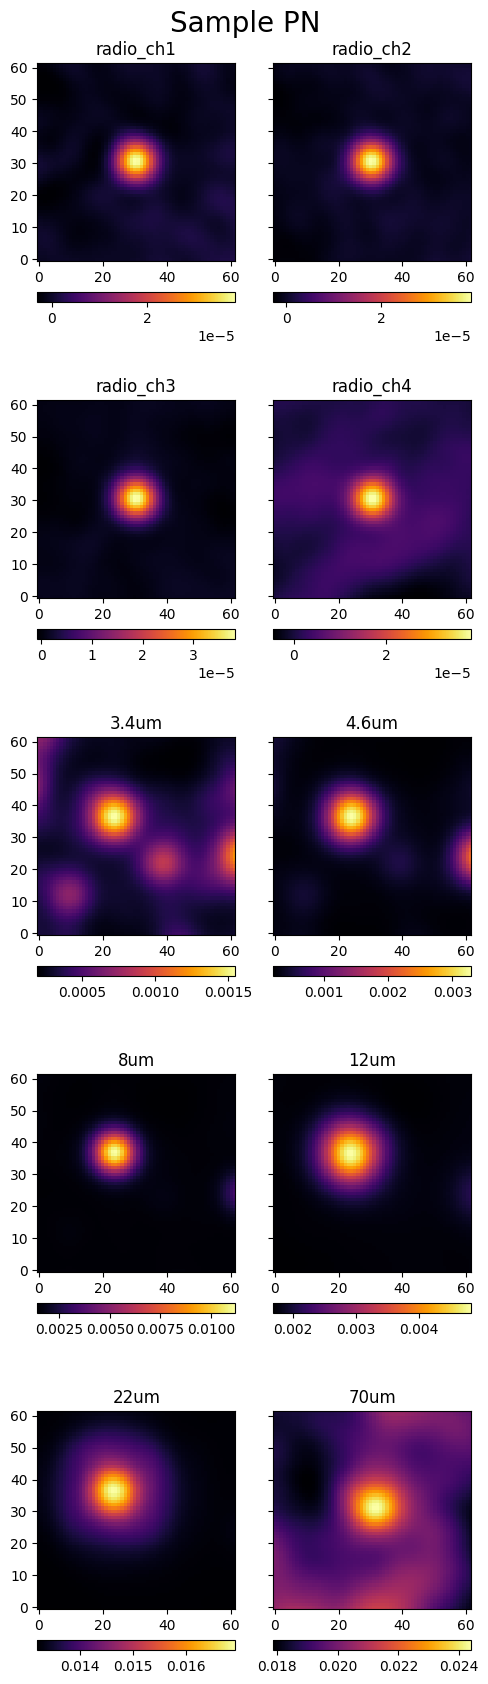

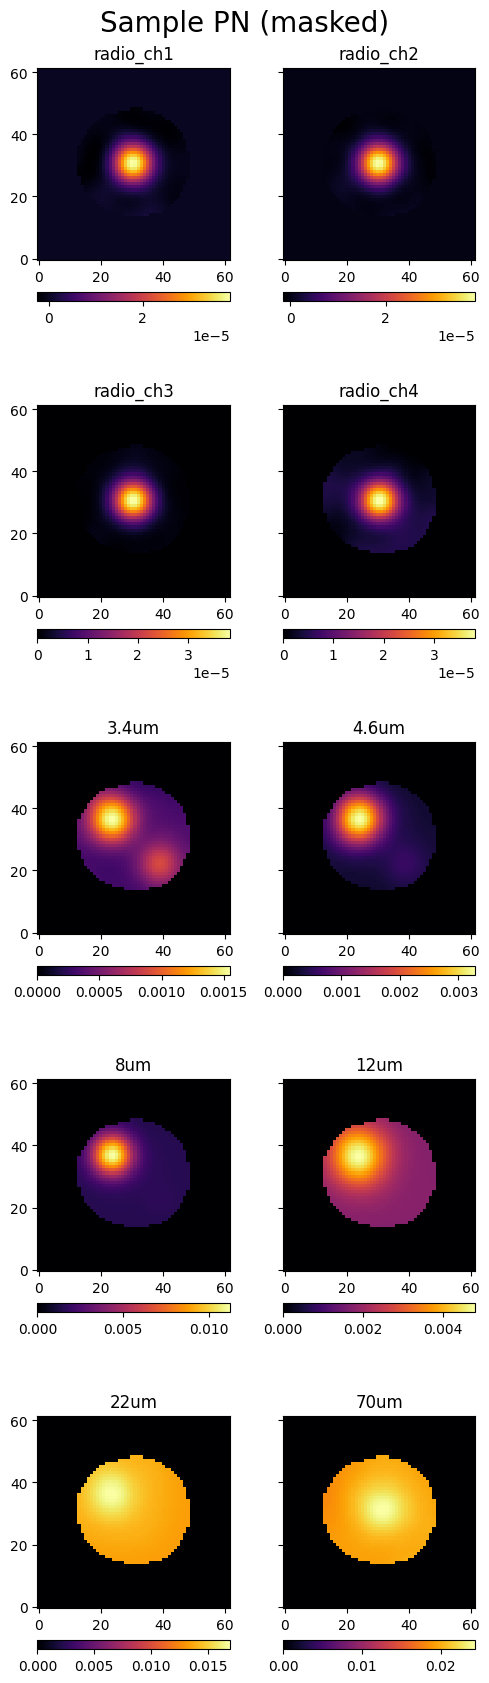

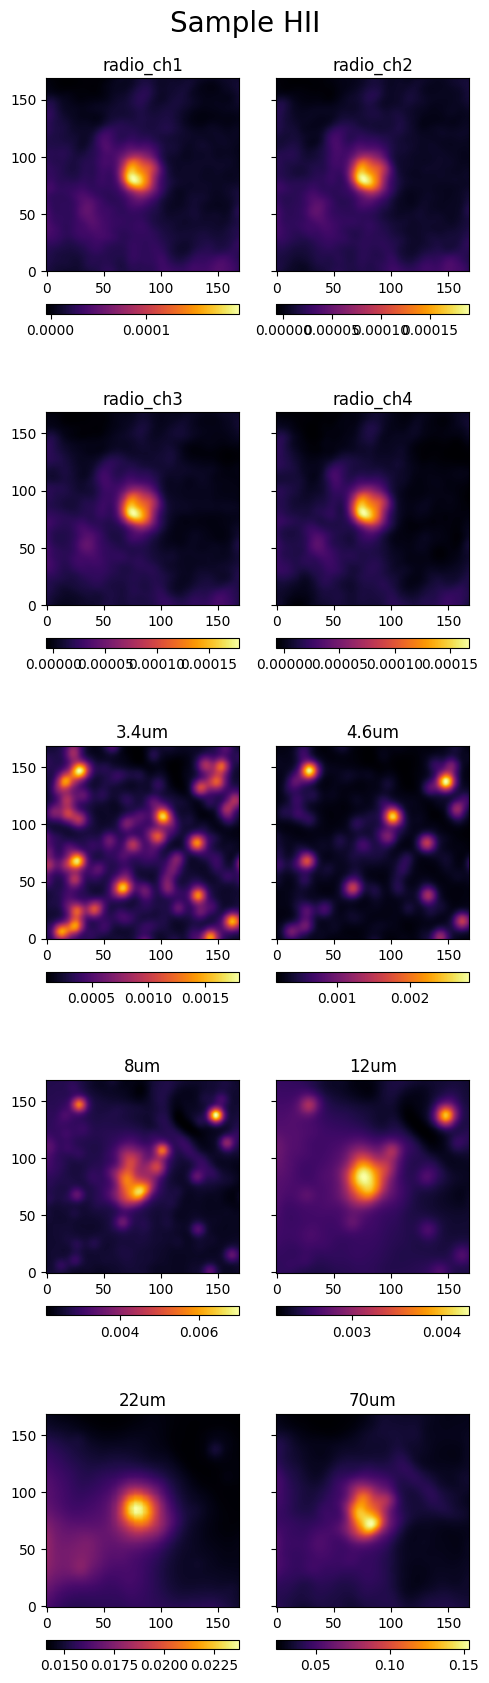

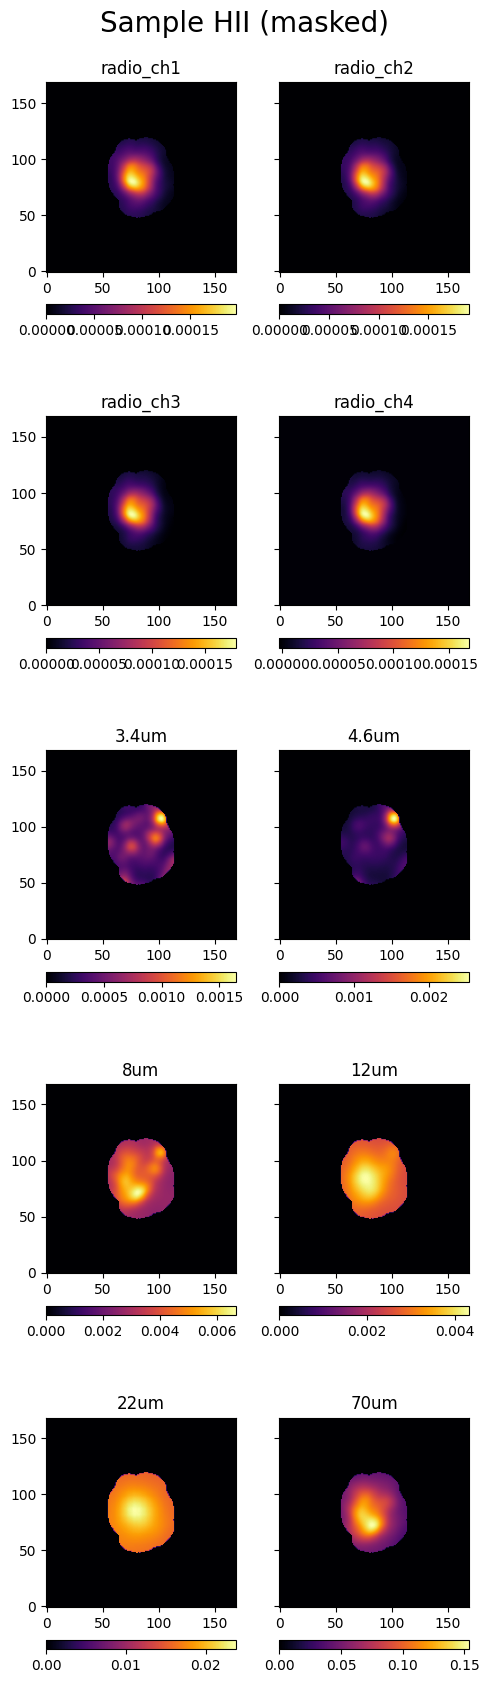

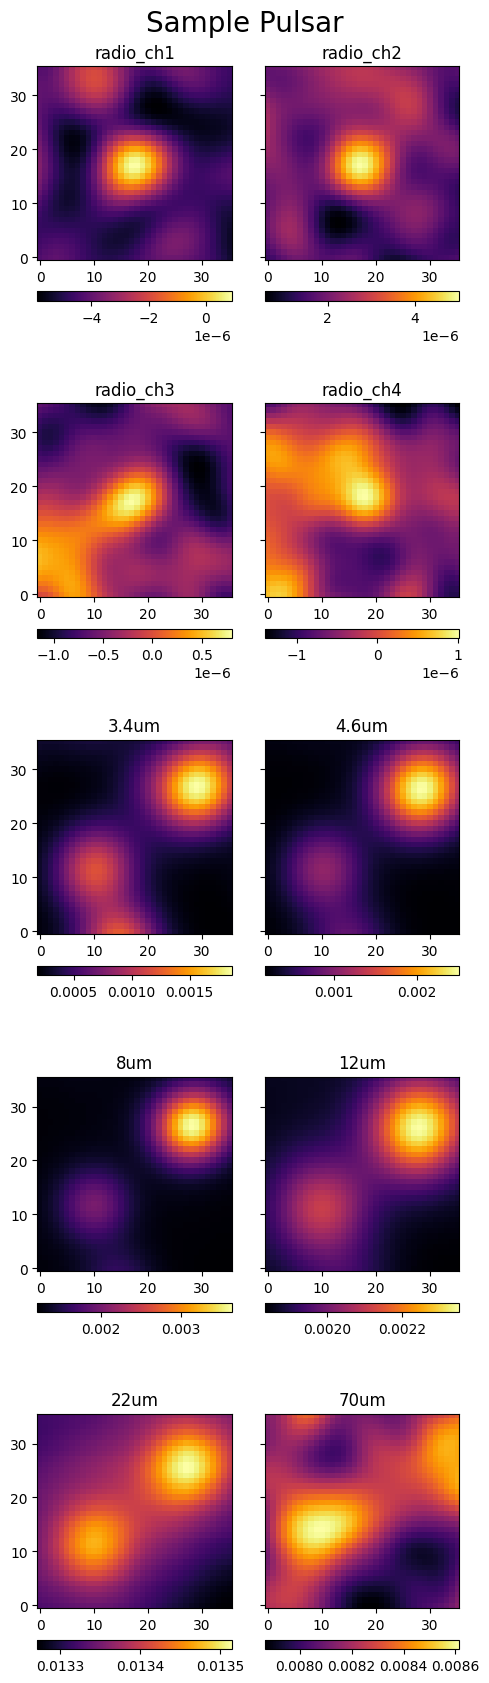

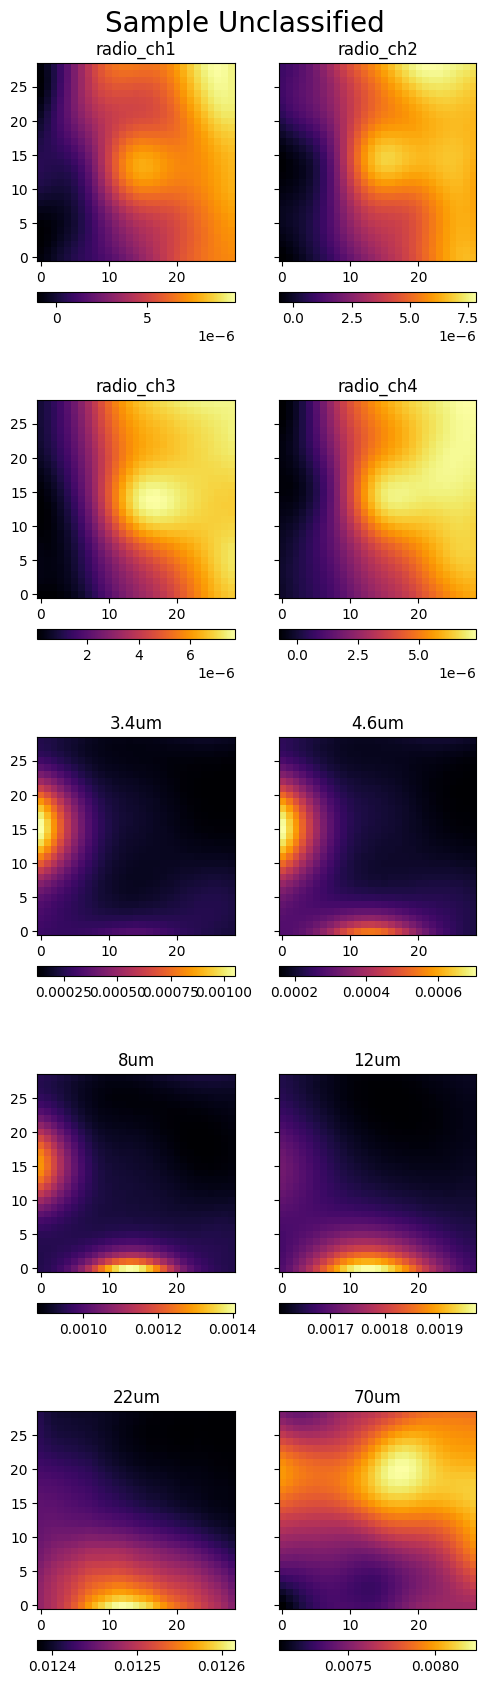

In [6]:
# %matplotlib inline
from astropy.io import fits
import glob
from directory_tree import display_tree
import matplotlib.pyplot as plt

def plot_imgs(sname, img_dir, title, masked=False):
    """Plot images"""

    # - Set filenames
    labels= ["radio_ch1", "radio_ch2", "radio_ch3", "radio_ch4", "3.4um", "4.6um", "8um", "12um", "22um", "70um"]
    surveys= ["meerkat_gps_ch1", "meerkat_gps_ch4", "meerkat_gps_ch9", "meerkat_gps_ch12", "wise_3_4", "wise_4_6", "irac_8", "wise_12", "wise_22", "higal_70"]
    filenames= [os.path.join(img_dir, sname + '_' + item + '.fits') for item in surveys]
    if masked:
        filenames= [os.path.join(img_dir, sname + '_' + item + '_masked.fits') for item in surveys]
    
    # - Read FITS images
    data_list= []
    for filename in filenames:
            #print("Reading file %s ..." % (filename))
            data= fits.open(filename)[0].data
            data_list.append(data)
            
    # - Draw images
    nrows= 5
    ncols= 2
    cmap= 'inferno'
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=(5, 20))

    for i in range(nrows):
        for j in range(ncols):
            index= j + i*ncols
            pos= ax[i][j].imshow(data_list[index], origin='lower', cmap=cmap)
            fig.colorbar(pos, ax=ax[i][j], location='bottom', pad=0.1, fraction=0.04)
            ax[i][j].set_title(labels[index])
            #ax[i][j].yaxis.tick_right()
            #ax[i][j].yaxis.set_label_position("right")

    # figure settings
    fig.suptitle(title, fontsize=20, y=0.84)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    
# - Enter top directory
os.chdir(topdir)

# - Display dataset structure
print("Displaying dataset directory structure ...")
display_tree(dataset_dir, max_depth=5)
print("")

#print("Displaying source directory structure ...")
#dataset_dir= "smgps-compact-source-dataset/data/G002/unclassified/radio"
#display_tree(dataset_dir, max_depth=2)
#print("")

# - Plot sample images
print("Plotting sample images ...")
sname= "G001.731+00.444"
img_dir= "smgps-compact-source-dataset/data/G002/PN/multiwavelength/original/" + sname
plot_imgs(sname, img_dir, "Sample PN")
img_dir= "smgps-compact-source-dataset/data/G002/PN/multiwavelength/masked/" + sname
plot_imgs(sname, img_dir, "Sample PN (masked)", True)

sname= "G003.318-00.030"
img_dir= "smgps-compact-source-dataset/data/G002/HII/multiwavelength/original/" + sname
plot_imgs(sname, img_dir, "Sample HII")
img_dir= "smgps-compact-source-dataset/data/G002/HII/multiwavelength/masked/" + sname
plot_imgs(sname, img_dir, "Sample HII (masked)", True)

sname= "G003.414+00.779"
img_dir= "smgps-compact-source-dataset/data/G002/Pulsar/multiwavelength/original/" + sname
plot_imgs(sname, img_dir, "Sample Pulsar")

sname= "G002_S2587"
img_dir= "smgps-compact-source-dataset/data/G002/unclassified/multiwavelength/original/" + sname
plot_imgs(sname, img_dir, "Sample Unclassified")

### Dataset Checks
Let's run some analysis on the dataset to check:
- the fraction of bad pixels (blank or NaNs) per each image and channel 
- if images have equal values (e.g. all pixels equal to the same value)
- the mean pixel flux value range for each channel

We will first create a run directory and add a data filelist (.json format), that we will use for data checking and model training. The dataset has already a filelist available but we need to modify the path to FITS images for our directory structure.

In [7]:
import os
import sys
import json

def modify_filelist(inputfile_fullpath):
    """Modify dataset image filelist with new paths"""

    print("Opening data filelist file %s ..." % (inputfile_fullpath))
    fp= open(inputfile_fullpath, "r")
    d= json.load(fp)
    data_dict= {"data": []}
    
    dataset_abspath= os.path.abspath(dataset_dir)

    for item in d["data"]:
        filepaths= item["filepaths"]
        filepaths_mod= []
        for filename in filepaths:
            filename_noprefix= filename[filename.find(dataset_name)+len(dataset_name):len(filename)]
            #filename_noprefix= filename[filename.find(search_pattern)+len(search_pattern):len(filename)]
            filename_newpath= dataset_abspath + filename_noprefix
            filepaths_mod.append(filename_newpath)
        
        item_mod= item
        item_mod["filepaths"]= filepaths_mod
        data_dict["data"].append(item_mod)
    
    # - Save modified input data list
    #outfile= os.path.join(topdir, inputfile)
    outfile= os.path.join(datalist_dir, inputfile)
    print("Saving file %s ..." % (outfile))
    with open(outfile, 'w') as fp:
        json.dump(data_dict, fp, indent=4)
    
    
    
# - Enter top directory
os.chdir(topdir)

# - Set input data filelist provided in the dataset and adjust image path
inputfile= "filelist_all_multiwavelength.json"
inputfile_fullpath= os.path.join(dataset_filelist_dir, inputfile)

modify_filelist(inputfile_fullpath)

# - Set input data filelist provided in the dataset and adjust image path
inputfile= "filelist_all_multiwavelength_masked.json"
inputfile_fullpath= os.path.join(dataset_filelist_dir, inputfile)

modify_filelist(inputfile_fullpath)


Opening data filelist file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smgps-compact-source-dataset/filelists/filelist_all_multiwavelength.json ...
Saving file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_all_multiwavelength.json ...
Opening data filelist file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smgps-compact-source-dataset/filelists/filelist_all_multiwavelength_masked.json ...
Saving file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_all_multiwavelength_masked.json ...


We also generate additional metadata/filelist files that are required by the `pixplotml` visualization tool:
- metadata file (csv format)
- image preview filelist (ascii format)

The dataset `filelists` directory already has pre-generated filelists. We will modify them for our local directory structure. 

In [8]:
import shutil
import os

def modify_preview_filelist(inputfile):
    """Modify preview filelists with local directory structure"""
    
    # - Read original filelist and modify path
    dataset_abspath= os.path.abspath(dataset_dir)
    filenames_newpath= []
    with open(inputfile, "r") as f:
        for item in f:
            #filename= f.readline().strip()
            filename= item.strip()
            filename_noprefix= filename[filename.find(dataset_name)+len(dataset_name):len(filename)]
            filename_newpath= dataset_abspath + filename_noprefix
            filenames_newpath.append(filename_newpath)
    
    # - Save modified list
    inputfile_base= os.path.basename(inputfile)
    outfile= os.path.join(datalist_dir, inputfile_base)
    print("Saving modified list to file %s ..." % (outfile))
    with open(outfile, "w") as fw:
        for item in filenames_newpath:
            fw.write(item + '\n')
        
# - Copying dataset metadata files to local datalists directory
print("Copying metadata files to dir %s ..." % (datalist_dir))
filename= os.path.join(dataset_filelist_dir, "metadata.csv")
filename_dest= os.path.join(datalist_dir, "metadata.csv")
shutil.copyfile(filename, filename_dest)

filename= os.path.join(dataset_filelist_dir, "metadata_masked.csv")
filename_dest= os.path.join(datalist_dir, "metadata_masked.csv")
shutil.copyfile(filename, filename_dest)

filename= os.path.join(dataset_filelist_dir, "metadata_radio.csv")
filename_dest= os.path.join(datalist_dir, "metadata_radio.csv")
shutil.copyfile(filename, filename_dest)

# - Modify preview filelists
filename= os.path.join(dataset_filelist_dir, "filelist_previews.dat")
modify_preview_filelist(filename)

filename= os.path.join(dataset_filelist_dir, "filelist_previews_masked.dat")
modify_preview_filelist(filename)

filename= os.path.join(dataset_filelist_dir, "filelist_previews_radio.dat")
modify_preview_filelist(filename)


Copying metadata files to dir /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists ...
Saving modified list to file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_previews.dat ...
Saving modified list to file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_previews_masked.dat ...
Saving modified list to file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_previews_radio.dat ...


We will use the `check_data.py` script provided in the `sclassifier` module to dump image pixel stats to ascii files. The `check_data.py` script produce two output files:
- `stats_flags.dat`: containing various flag parameters for each channel, such as the fraction of negative/bad pixels, and the number of peaks found in first radio channel.
- `stats_info.dat`: containing min/max/mean/std values for each channel

We will run the script with and without pre-processing to the dataset. The pre-processing includes two steps:

- Resize input image to size 64x64 (upscaling it if smaller than 64x64)
- Scale each pixel value by the absolute pixel maximum among all channels

In [9]:
import os
import sys
import sclassifier
print(sclassifier.__version__)

# - Entering run directory
print("Entering dir %s ..." % (datacheck_dir))
os.chdir(datacheck_dir)

# - Run check_data script
##inputfile= "filelist_all_multiwavelength.json"
inputfile= "filelist_all_multiwavelength_masked.json"
inputfile_fullpath= os.path.join(datalist_dir, inputfile)
script_dir= sys.executable.replace("/python","")
exe= os.path.join(script_dir, "check_data.py")
##%run {exe} --help
%run {exe} --dump_stats --dump_flags --datalist={inputfile_fullpath}

# - Rename output files
outfile= os.path.join(datacheck_dir, "stats_flags.dat")
outfile_new= os.path.join(datacheck_dir, "stats_flags_orig.dat")
os.rename(outfile, outfile_new)

outfile= os.path.join(datacheck_dir, "stats_info.dat")
outfile_new= os.path.join(datacheck_dir, "stats_info_orig.dat")
os.rename(outfile, outfile_new)

# - Run check data script applying a scaling preprocessing
#   1) resize 64x64
#   2) scale_to_abs_max
#%run {exe} --dump_stats --dump_flags --datalist={inputfile_fullpath} \
#    --resize --resize_size=64 --upscale

##%run {exe} --dump_stats --dump_flags --datalist={inputfile_fullpath} \
##    --resize --resize_size=64 --upscale \
##    --scale_to_abs_max \
##    --scale --scale_factors=1000,1000,1000,1000,1,1,1,1,1,1

%run {exe} --dump_stats --dump_flags --datalist={inputfile_fullpath} \
    --resize --resize_size=64 --upscale \
    --standardize \
    --img_means=-2.4327846296485538e-20,7.882195873776254e-08,1.468210228949829e-07,1.7511619176957538e-07,0.00030839390819892287,0.00025849833036772907,0.0012217327021062374,0.001805757055990398,0.012928033247590065,0.010108632035553455 \
    --img_sigmas=6.029965220477607e-06,3.613506123656407e-06,1.552860055653582e-06,1.4247732877947783e-06,0.00022028665262041613,0.0001499619902460836,0.0007711623329669237,0.00033891561906784773,0.0011827377602458,0.009940686170011759

#--img_means=8e-7,8e-7,8e-7,8e-7,3.741e-4,3.17e-4,1.41e-3,1.771e-3,1.199e-2,1.29e-2 \
#--img_sigmas=2.947e-6,2.947e-6,2.947e-6,2.947e-6,1.771e-4,1.477e-4,4.094e-4,4.282e-4,2.85e-3,3.526e-3

#--meanshift --img_means=8e-7,8e-7,8e-7,8e-7,3.741e-4,3.17e-4,1.41e-3,1.771e-3,1.199e-2,1.29e-2

# - Rename output files
outfile= os.path.join(datacheck_dir, "stats_flags.dat")
outfile_new= os.path.join(datacheck_dir, "stats_flags_preproc.dat")
os.rename(outfile, outfile_new)

outfile= os.path.join(datacheck_dir, "stats_info.dat")
outfile_new= os.path.join(datacheck_dir, "stats_info_preproc.dat")
os.rename(outfile, outfile_new)

# - Return to topdir
os.chdir(topdir)

1.0.5
Entering dir /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/data_checks ...


2024-03-18 09:42:49.018270: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 09:42:49.037905: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 09:42:49.204970: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 09:42:49.206496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 09:42:50.008189: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

== PRE-PROCESSING STAGES ==
[]


2024-03-18 09:42:51 INFO - Reading image no. 8 (name=G003.651-00.251, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 9 (name=G003.557+01.354, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 10 (name=G003.431-01.072, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 11 (name=G003.728-00.385, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 12 (name=G003.310+01.034, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 13 (name=G002.252+00.554, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 14 (name=G002.012+00.744, label=PN) ...
2024-03-18 09:42:51 INFO - Reading image no. 15 (name=G002.483+01.188, label=PN) ...
2024-03-18 09:42:51 INFO - Image 15 chan 10 (name=G002.483+01.188, label=PN): n=1876, n_zeros=37, f=0.019723
2024-03-18 09:42:52 INFO - Reading image no. 16 (name=G001.996+00.197, label=PN) ...
2024-03-18 09:42:52 INFO - Reading image no. 17 (name=G001.868-00.534, label=PN) ...
2024-03-18 09:42:52 INFO - Reading image no

2024-03-18 09:42:54 INFO - Reading image no. 99 (name=G002_S991, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 100 (name=G002_S2224, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 101 (name=G002_S1646, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 102 (name=G002_S2882, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 103 (name=G002_S1901, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 104 (name=G002_S3630, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 105 (name=G002_S4015, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 106 (name=G002_S3063, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 107 (name=G002_S2544, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 108 (name=G002_S113, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 109 (name=G002_S2901, label=UNKNOWN) ...
2024-03-18 09:42:54 INFO - Reading image no. 110 (name=G0

2024-03-18 09:42:56 INFO - Reading image no. 191 (name=G002_S1892, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 192 (name=G002_S1979, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 193 (name=G002_S4338, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 194 (name=G002_S2318, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 195 (name=G002_S4971, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 196 (name=G002_S3616, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 197 (name=G002_S3366, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 198 (name=G002_S5500, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 199 (name=G002_S5569, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 200 (name=G002_S2828, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 201 (name=G002_S1053, label=UNKNOWN) ...
2024-03-18 09:42:56 INFO - Reading image no. 202 (name

2024-03-18 09:42:59 INFO - Reading image no. 287 (name=G002_S1305, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 288 (name=G002_S6056, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 289 (name=G002_S2754, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 290 (name=G002_S2629, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 291 (name=G002_S4247, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 292 (name=G002_S2689, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 293 (name=G002_S4770, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 294 (name=G002_S4164, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 295 (name=G002_S3586, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 296 (name=G002_S228, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 297 (name=G002_S4221, label=UNKNOWN) ...
2024-03-18 09:42:59 INFO - Reading image no. 298 (name=

2024-03-18 09:43:01 INFO - Reading image no. 377 (name=G002_S1442, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 378 (name=G002_S3958, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 379 (name=G002_S4212, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 380 (name=G002_S3525, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 381 (name=G002_S3677, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 382 (name=G002_S4152, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 383 (name=G002_S5649, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 384 (name=G002_S3303, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Reading image no. 385 (name=G002_S2763, label=UNKNOWN) ...
2024-03-18 09:43:01 INFO - Image 385 chan 2 (name=G002_S2763, label=UNKNOWN): n=867, n_zeros=221, f=0.254902
2024-03-18 09:43:01 WARNING - Image 385 chan 2 (name=G002_S2763, label=UNKNOWN) has a zero fraction 0.254902, check!


2024-03-18 09:43:03 INFO - Reading image no. 461 (name=G002_S1494, label=UNKNOWN) ...
2024-03-18 09:43:03 INFO - Reading image no. 462 (name=G002_S136, label=UNKNOWN) ...
2024-03-18 09:43:03 INFO - Reading image no. 463 (name=G002_S501, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 464 (name=G002_S4430, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 465 (name=G002_S2098, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 466 (name=G002_S5427, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 467 (name=G002_S3883, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 468 (name=G002_S5188, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 469 (name=G002_S2575, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 470 (name=G002_S2072, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 471 (name=G002_S4777, label=UNKNOWN) ...
2024-03-18 09:43:04 INFO - Reading image no. 472 (name=G

2024-03-18 09:43:06 INFO - Reading image no. 557 (name=G002_S537, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 558 (name=G002_S1575, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 559 (name=G002_S1125, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 560 (name=G002_S3449, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 561 (name=G002_S4755, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 562 (name=G002_S4903, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 563 (name=G002_S1301, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 564 (name=G002_S797, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 565 (name=G002_S189, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 566 (name=G002_S183, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 567 (name=G002_S1984, label=UNKNOWN) ...
2024-03-18 09:43:06 INFO - Reading image no. 568 (name=G00

2024-03-18 09:43:08 INFO - Reading image no. 653 (name=G002_S3262, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 654 (name=G002_S4648, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 655 (name=G002_S1335, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 656 (name=G002_S1530, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 657 (name=G002_S2583, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 658 (name=G002_S5554, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 659 (name=G002_S2543, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 660 (name=G002_S3376, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 661 (name=G002_S3866, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 662 (name=G002_S6200, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 663 (name=G002_S5240, label=UNKNOWN) ...
2024-03-18 09:43:09 INFO - Reading image no. 664 (name

2024-03-18 09:43:11 INFO - Reading image no. 743 (name=G002_S1326, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 744 (name=G002_S4452, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 745 (name=G002_S1935, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 746 (name=G002_S3560, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 747 (name=G002_S2071, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 748 (name=G002_S367, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 749 (name=G002_S3475, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 750 (name=G002_S3834, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 751 (name=G002_S4416, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 752 (name=G002_S3392, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 753 (name=G002_S3772, label=UNKNOWN) ...
2024-03-18 09:43:11 INFO - Reading image no. 754 (name=

2024-03-18 09:43:13 INFO - Reading image no. 836 (name=G002_S5413, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 837 (name=G002_S5049, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 838 (name=G002_S3913, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 839 (name=G002_S3091, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 840 (name=G002_S5652, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 841 (name=G002_S826, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 842 (name=G002_S1971, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 843 (name=G002_S3915, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 844 (name=G002_S3808, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 845 (name=G002_S3438, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 846 (name=G002_S4639, label=UNKNOWN) ...
2024-03-18 09:43:13 INFO - Reading image no. 847 (name=

2024-03-18 09:43:16 INFO - Reading image no. 932 (name=G002_S6113, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 933 (name=G002_S875, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 934 (name=G002_S4330, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 935 (name=G002_S4943, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 936 (name=G002_S6108, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Image 936 chan 2 (name=G002_S6108, label=UNKNOWN): n=583, n_zeros=12, f=0.020583
2024-03-18 09:43:16 INFO - Image 936 chan 3 (name=G002_S6108, label=UNKNOWN): n=583, n_zeros=9, f=0.015437
2024-03-18 09:43:16 INFO - Image 936 chan 4 (name=G002_S6108, label=UNKNOWN): n=583, n_zeros=6, f=0.010292
2024-03-18 09:43:16 INFO - Reading image no. 937 (name=G002_S4807, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 938 (name=G002_S1513, label=UNKNOWN) ...
2024-03-18 09:43:16 INFO - Reading image no. 939 (name=G002_S4252, label=UNKN

2024-03-18 09:43:18 INFO - Reading image no. 1020 (name=G002_S2404, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1021 (name=G002_S5384, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1022 (name=G002_S4185, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1023 (name=G002_S3230, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1024 (name=G002_S5720, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1025 (name=G002_S2762, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1026 (name=G002_S118, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1027 (name=G002_S1475, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1028 (name=G002_S3784, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1029 (name=G002_S3978, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no. 1030 (name=G002_S3519, label=UNKNOWN) ...
2024-03-18 09:43:18 INFO - Reading image no.

2024-03-18 09:43:20 INFO - Reading image no. 1114 (name=G002_S4698, label=UNKNOWN) ...
2024-03-18 09:43:20 INFO - Reading image no. 1115 (name=G002_S2484, label=UNKNOWN) ...
2024-03-18 09:43:20 INFO - Reading image no. 1116 (name=G002_S3940, label=UNKNOWN) ...
2024-03-18 09:43:20 INFO - Reading image no. 1117 (name=G002_S2288, label=UNKNOWN) ...
2024-03-18 09:43:20 INFO - Reading image no. 1118 (name=G002_S327, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1119 (name=G002_S2201, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1120 (name=G002_S1737, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1121 (name=G002_S5266, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1122 (name=G002_S1865, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1123 (name=G002_S1452, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1124 (name=G002_S50, label=UNKNOWN) ...
2024-03-18 09:43:21 INFO - Reading image no. 1

2024-03-18 09:43:23 INFO - Reading image no. 1209 (name=G002_S2428, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1210 (name=G002_S3013, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1211 (name=G002_S4436, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1212 (name=G002_S451, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1213 (name=G002_S2207, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1214 (name=G002_S5160, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1215 (name=G002_S3160, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1216 (name=G002_S2202, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1217 (name=G002_S2050, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1218 (name=G002_S4704, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no. 1219 (name=G002_S1256, label=UNKNOWN) ...
2024-03-18 09:43:23 INFO - Reading image no.

2024-03-18 09:43:25 INFO - Reading image no. 1298 (name=G002_S5179, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1299 (name=G002_S5445, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1300 (name=G002_S401, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1301 (name=G002_S2123, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1302 (name=G002_S2910, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1303 (name=G002_S4522, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1304 (name=G002_S3254, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1305 (name=G002_S2844, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1306 (name=G002_S357, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1307 (name=G002_S2950, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 1308 (name=G002_S2340, label=UNKNOWN) ...
2024-03-18 09:43:25 INFO - Reading image no. 

2024-03-18 09:43:28 INFO - Reading image no. 1393 (name=G002_S2177, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1394 (name=G002_S4809, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1395 (name=G002_S1102, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1396 (name=G002_S34, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1397 (name=G002_S602, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1398 (name=G002_S1160, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1399 (name=G002_S5110, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1400 (name=G002_S3402, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1401 (name=G002_S3038, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1402 (name=G002_S2368, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1403 (name=G002_S2747, label=UNKNOWN) ...
2024-03-18 09:43:28 INFO - Reading image no. 1

2024-03-18 09:43:30 INFO - Reading image no. 1485 (name=G002_S2716, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1486 (name=G002_S975, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1487 (name=G002_S4113, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1488 (name=G002_S3212, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1489 (name=G002_S3629, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1490 (name=G002_S3298, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1491 (name=G002_S2120, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1492 (name=G002_S5870, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1493 (name=G002_S2843, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1494 (name=G002_S5450, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no. 1495 (name=G002_S2053, label=UNKNOWN) ...
2024-03-18 09:43:30 INFO - Reading image no.

2024-03-18 09:43:32 INFO - Reading image no. 1571 (name=G002_S4621, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1572 (name=G002_S3470, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1573 (name=G002_S969, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1574 (name=G002_S5148, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1575 (name=G002_S943, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1576 (name=G002_S4678, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1577 (name=G002_S4883, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1578 (name=G002_S3660, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1579 (name=G002_S3090, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1580 (name=G002_S5606, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 1581 (name=G002_S2062, label=UNKNOWN) ...
2024-03-18 09:43:32 INFO - Reading image no. 

2024-03-18 09:43:35 INFO - Reading image no. 1666 (name=G002_S2024, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1667 (name=G002_S3686, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1668 (name=G002_S6129, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1669 (name=G002_S1755, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1670 (name=G002_S3572, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1671 (name=G002_S99, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1672 (name=G002_S4018, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1673 (name=G002_S1377, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1674 (name=G002_S3050, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1675 (name=G002_S92, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 1676 (name=G002_S1426, label=UNKNOWN) ...
2024-03-18 09:43:35 INFO - Reading image no. 16

2024-03-18 09:43:37 INFO - Reading image no. 1760 (name=G002_S4233, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1761 (name=G002_S885, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1762 (name=G002_S4674, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1763 (name=G002_S324, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1764 (name=G002_S5213, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1765 (name=G002_S3005, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1766 (name=G002_S5248, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1767 (name=G002_S3345, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1768 (name=G002_S4926, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1769 (name=G002_S2118, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 1770 (name=G002_S1607, label=UNKNOWN) ...
2024-03-18 09:43:37 INFO - Reading image no. 

2024-03-18 09:43:39 INFO - Reading image no. 1851 (name=G002_S4319, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1852 (name=G002_S255, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1853 (name=G002_S5077, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1854 (name=G002_S305, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1855 (name=G002_S2889, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1856 (name=G002_S3861, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1857 (name=G002_S3111, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1858 (name=G002_S6115, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1859 (name=G002_S1613, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1860 (name=G002_S2508, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 1861 (name=G002_S1127, label=UNKNOWN) ...
2024-03-18 09:43:39 INFO - Reading image no. 

2024-03-18 09:43:42 INFO - Reading image no. 1946 (name=G002_S3306, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1947 (name=G002_S44, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1948 (name=G002_S127, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1949 (name=G002_S488, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1950 (name=G002_S5440, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1951 (name=G002_S2265, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1952 (name=G002_S5511, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1953 (name=G002_S4087, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1954 (name=G002_S4820, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1955 (name=G002_S6087, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 1956 (name=G002_S1540, label=UNKNOWN) ...
2024-03-18 09:43:42 INFO - Reading image no. 19

2024-03-18 09:43:44 INFO - Reading image no. 2040 (name=G002_S2847, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2041 (name=G002_S1733, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2042 (name=G002_S1387, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2043 (name=G002_S1257, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2044 (name=G002_S1422, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2045 (name=G002_S1458, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2046 (name=G002_S2382, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2047 (name=G002_S1756, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2048 (name=G002_S3733, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2049 (name=G002_S4392, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no. 2050 (name=G002_S4144, label=UNKNOWN) ...
2024-03-18 09:43:44 INFO - Reading image no

2024-03-18 09:43:46 INFO - Reading image no. 2135 (name=G002_S2048, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2136 (name=G002_S750, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2137 (name=G002_S5854, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2138 (name=G002_S5278, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2139 (name=G002_S1479, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2140 (name=G002_S5048, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2141 (name=G002_S5385, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2142 (name=G002_S710, label=UNKNOWN) ...
2024-03-18 09:43:46 INFO - Reading image no. 2143 (name=G002_S2718, label=UNKNOWN) ...
2024-03-18 09:43:47 INFO - Reading image no. 2144 (name=G002_S4733, label=UNKNOWN) ...
2024-03-18 09:43:47 INFO - Reading image no. 2145 (name=G002_S2214, label=UNKNOWN) ...
2024-03-18 09:43:47 INFO - Reading image no. 

2024-03-18 09:43:49 INFO - Reading image no. 2230 (name=G002_S3256, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2231 (name=G002_S1393, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2232 (name=G002_S2576, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2233 (name=G002_S2719, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2234 (name=G002_S5587, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2235 (name=G002_S4502, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2236 (name=G002_S2438, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2237 (name=G002_S867, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2238 (name=G002_S382, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2239 (name=G002_S441, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2240 (name=G002_S4102, label=UNKNOWN) ...
2024-03-18 09:43:49 INFO - Reading image no. 2

2024-03-18 09:43:51 INFO - Reading image no. 2321 (name=G002_S5768, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2322 (name=G002_S3828, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2323 (name=G002_S4671, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2324 (name=G002_S2035, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2325 (name=G002_S2137, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2326 (name=G002_S4227, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2327 (name=G002_S1288, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2328 (name=G002_S4538, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2329 (name=G002_S4443, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2330 (name=G002_S3379, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no. 2331 (name=G002_S2144, label=UNKNOWN) ...
2024-03-18 09:43:51 INFO - Reading image no

2024-03-18 09:43:54 INFO - Reading image no. 2416 (name=G002_S197, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2417 (name=G002_S2377, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2418 (name=G002_S235, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2419 (name=G002_S3982, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2420 (name=G002_S3046, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2421 (name=G002_S4160, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2422 (name=G002_S4204, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2423 (name=G002_S1757, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2424 (name=G002_S2283, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2425 (name=G002_S918, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2426 (name=G002_S5365, label=UNKNOWN) ...
2024-03-18 09:43:54 INFO - Reading image no. 2

2024-03-18 09:43:56 INFO - Reading image no. 2511 (name=G002_S2395, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2512 (name=G002_S5346, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2513 (name=G002_S2210, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2514 (name=G002_S1177, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2515 (name=G002_S4076, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2516 (name=G002_S623, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2517 (name=G002_S3308, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2518 (name=G002_S1857, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2519 (name=G002_S764, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2520 (name=G002_S5830, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2521 (name=G002_S716, label=UNKNOWN) ...
2024-03-18 09:43:56 INFO - Reading image no. 2

2024-03-18 09:43:58 INFO - Reading image no. 2605 (name=G002_S1130, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2606 (name=G002_S3264, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2607 (name=G002_S3198, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2608 (name=G002_S1676, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2609 (name=G002_S4035, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2610 (name=G002_S1395, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2611 (name=G002_S574, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2612 (name=G002_S1334, label=UNKNOWN) ...
2024-03-18 09:43:58 INFO - Reading image no. 2613 (name=G002_S5391, label=UNKNOWN) ...
2024-03-18 09:43:59 INFO - Reading image no. 2614 (name=G002_S2076, label=UNKNOWN) ...
2024-03-18 09:43:59 INFO - Reading image no. 2615 (name=G002_S6030, label=UNKNOWN) ...
2024-03-18 09:43:59 INFO - Reading image no.

2024-03-18 09:44:01 INFO - Reading image no. 2700 (name=G002_S4325, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2701 (name=G002_S4959, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2702 (name=G002_S1471, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2703 (name=G002_S2197, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2704 (name=G002_S4565, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2705 (name=G002_S707, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2706 (name=G002_S3954, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2707 (name=G002_S2498, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2708 (name=G002_S1059, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2709 (name=G002_S5803, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no. 2710 (name=G002_S4307, label=UNKNOWN) ...
2024-03-18 09:44:01 INFO - Reading image no.

2024-03-18 09:44:03 INFO - Reading image no. 2795 (name=G002_S4797, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2796 (name=G002_S2336, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2797 (name=G002_S2496, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2798 (name=G002_S5662, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2799 (name=G002_S4701, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2800 (name=G002_S5592, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2801 (name=G002_S3878, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2802 (name=G002_S2473, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2803 (name=G002_S5292, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2804 (name=G002_S1313, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no. 2805 (name=G002_S5811, label=UNKNOWN) ...
2024-03-18 09:44:03 INFO - Reading image no

2024-03-18 09:44:05 INFO - Reading image no. 2890 (name=G002_S4622, label=UNKNOWN) ...
2024-03-18 09:44:05 INFO - Reading image no. 2891 (name=G002_S605, label=UNKNOWN) ...
2024-03-18 09:44:05 INFO - Reading image no. 2892 (name=G002_S1954, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2893 (name=G002_S4862, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2894 (name=G002_S2360, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2895 (name=G002_S4071, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2896 (name=G002_S2361, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2897 (name=G002_S20, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2898 (name=G002_S739, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2899 (name=G002_S693, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 2900 (name=G002_S2838, label=UNKNOWN) ...
2024-03-18 09:44:06 INFO - Reading image no. 290

2024-03-18 09:44:08 INFO - Reading image no. 2985 (name=G002_S4201, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2986 (name=G002_S673, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2987 (name=G002_S4149, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2988 (name=G002_S5084, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2989 (name=G002_S206, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2990 (name=G002_S1665, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2991 (name=G002_S4918, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2992 (name=G002_S3166, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2993 (name=G002_S1095, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2994 (name=G002_S121, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2995 (name=G002_S5122, label=UNKNOWN) ...
2024-03-18 09:44:08 INFO - Reading image no. 2

2024-03-18 09:44:10 INFO - Reading image no. 3077 (name=G002_S470, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3078 (name=G002_S5449, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3079 (name=G002_S5934, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3080 (name=G002_S1782, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3081 (name=G002_S5363, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Image 3081 chan 2 (name=G002_S5363, label=UNKNOWN): n=641, n_zeros=52, f=0.081123
2024-03-18 09:44:10 INFO - Image 3081 chan 3 (name=G002_S5363, label=UNKNOWN): n=641, n_zeros=18, f=0.028081
2024-03-18 09:44:10 INFO - Image 3081 chan 4 (name=G002_S5363, label=UNKNOWN): n=641, n_zeros=31, f=0.048362
2024-03-18 09:44:10 INFO - Reading image no. 3082 (name=G002_S4380, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3083 (name=G002_S2088, label=UNKNOWN) ...
2024-03-18 09:44:10 INFO - Reading image no. 3084 (name=G002_S222

2024-03-18 09:44:12 INFO - Reading image no. 3168 (name=G002_S1041, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3169 (name=G002_S1637, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3170 (name=G002_S2774, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3171 (name=G002_S6104, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3172 (name=G002_S3211, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3173 (name=G002_S1705, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3174 (name=G002_S1868, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3175 (name=G002_S3531, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3176 (name=G002_S60, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3177 (name=G002_S5955, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 3178 (name=G002_S5585, label=UNKNOWN) ...
2024-03-18 09:44:12 INFO - Reading image no. 

2024-03-18 09:44:14 INFO - Reading image no. 3259 (name=G002_S3937, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3260 (name=G002_S4463, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3261 (name=G002_S4012, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3262 (name=G002_S572, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3263 (name=G002_S1667, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3264 (name=G002_S462, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3265 (name=G002_S4331, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3266 (name=G002_S3169, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3267 (name=G002_S3208, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3268 (name=G002_S2122, label=UNKNOWN) ...
2024-03-18 09:44:14 INFO - Reading image no. 3269 (name=G002_S2188, label=UNKNOWN) ...
2024-03-18 09:44:15 INFO - Reading image no. 

2024-03-18 09:44:16 INFO - Reading image no. 3351 (name=G002_S823, label=UNKNOWN) ...
2024-03-18 09:44:16 INFO - Reading image no. 3352 (name=G002_S2876, label=UNKNOWN) ...
2024-03-18 09:44:16 INFO - Reading image no. 3353 (name=G002_S3648, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3354 (name=G002_S2125, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3355 (name=G002_S15, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3356 (name=G002_S4638, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3357 (name=G002_S2257, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3358 (name=G002_S2510, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3359 (name=G002_S4739, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3360 (name=G002_S1135, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3361 (name=G002_S2609, label=UNKNOWN) ...
2024-03-18 09:44:17 INFO - Reading image no. 3

2024-03-18 09:44:19 INFO - Image 3438 chan 4 (name=G002_S4282, label=UNKNOWN): n=612, n_zeros=65, f=0.106209
2024-03-18 09:44:19 WARNING - Image 3438 chan 4 (name=G002_S4282, label=UNKNOWN) has a zero fraction 0.106209, check!
2024-03-18 09:44:19 INFO - Reading image no. 3439 (name=G002_S3639, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3440 (name=G002_S4188, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3441 (name=G002_S3502, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3442 (name=G002_S2279, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3443 (name=G002_S1370, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3444 (name=G002_S27, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3445 (name=G002_S2121, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3446 (name=G002_S4492, label=UNKNOWN) ...
2024-03-18 09:44:19 INFO - Reading image no. 3447 (name=G002_S5465, label=UNKNO

2024-03-18 09:44:21 INFO - Reading image no. 3531 (name=G002_S4162, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3532 (name=G002_S1578, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3533 (name=G002_S1712, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3534 (name=G002_S2663, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3535 (name=G002_S3562, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3536 (name=G002_S4720, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3537 (name=G002_S3529, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3538 (name=G002_S1718, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3539 (name=G002_S3467, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3540 (name=G002_S4798, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no. 3541 (name=G002_S2645, label=UNKNOWN) ...
2024-03-18 09:44:21 INFO - Reading image no

2024-03-18 09:44:23 INFO - Reading image no. 3626 (name=G002_S4676, label=UNKNOWN) ...
2024-03-18 09:44:23 INFO - Reading image no. 3627 (name=G002_S180, label=UNKNOWN) ...
2024-03-18 09:44:23 INFO - Reading image no. 3628 (name=G002_S165, label=UNKNOWN) ...
2024-03-18 09:44:23 INFO - Reading image no. 3629 (name=G002_S2722, label=UNKNOWN) ...
2024-03-18 09:44:23 INFO - Reading image no. 3630 (name=G002_S3393, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3631 (name=G002_S1203, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3632 (name=G002_S1866, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3633 (name=G002_S3760, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3634 (name=G002_S4906, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3635 (name=G002_S3767, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 3636 (name=G002_S3850, label=UNKNOWN) ...
2024-03-18 09:44:24 INFO - Reading image no. 

2024-03-18 09:44:26 INFO - Reading image no. 3721 (name=G002_S1189, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3722 (name=G002_S5192, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3723 (name=G002_S95, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3724 (name=G002_S4951, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3725 (name=G002_S1283, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3726 (name=G002_S3175, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3727 (name=G002_S1116, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3728 (name=G002_S4125, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3729 (name=G002_S4766, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3730 (name=G002_S2831, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 3731 (name=G002_S18, label=UNKNOWN) ...
2024-03-18 09:44:26 INFO - Reading image no. 37

2024-03-18 09:44:28 INFO - Reading image no. 3813 (name=G002_S2228, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3814 (name=G002_S749, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3815 (name=G002_S2093, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3816 (name=G002_S1960, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3817 (name=G002_S1255, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3818 (name=G002_S5402, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3819 (name=G002_S3773, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3820 (name=G002_S4305, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3821 (name=G002_S3145, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3822 (name=G002_S1517, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no. 3823 (name=G002_S1016, label=UNKNOWN) ...
2024-03-18 09:44:28 INFO - Reading image no.

2024-03-18 09:44:30 INFO - Reading image no. 3907 (name=G002_S2431, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3908 (name=G002_S774, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3909 (name=G002_S3580, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3910 (name=G002_S3979, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3911 (name=G002_S2316, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3912 (name=G002_S5008, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3913 (name=G002_S3037, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3914 (name=G002_S904, label=UNKNOWN) ...
2024-03-18 09:44:30 INFO - Reading image no. 3915 (name=G002_S2479, label=UNKNOWN) ...
2024-03-18 09:44:31 INFO - Reading image no. 3916 (name=G002_S1934, label=UNKNOWN) ...
2024-03-18 09:44:31 INFO - Reading image no. 3917 (name=G002_S2865, label=UNKNOWN) ...
2024-03-18 09:44:31 INFO - Reading image no. 

2024-03-18 09:44:33 INFO - Reading image no. 4002 (name=G002_S3944, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4003 (name=G002_S4312, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4004 (name=G002_S523, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4005 (name=G002_S5431, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Image 4005 chan 2 (name=G002_S5431, label=UNKNOWN): n=697, n_zeros=1, f=0.001435
2024-03-18 09:44:33 INFO - Image 4005 chan 3 (name=G002_S5431, label=UNKNOWN): n=697, n_zeros=3, f=0.004304
2024-03-18 09:44:33 INFO - Image 4005 chan 4 (name=G002_S5431, label=UNKNOWN): n=697, n_zeros=2, f=0.002869
2024-03-18 09:44:33 INFO - Reading image no. 4006 (name=G002_S5133, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4007 (name=G002_S4904, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4008 (name=G002_S261, label=UNKNOWN) ...
2024-03-18 09:44:33 INFO - Reading image no. 4009 (name=G002_S691, la

2024-03-18 09:44:35 INFO - Reading image no. 4093 (name=G002_S1501, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4094 (name=G002_S4819, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4095 (name=G002_S1629, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4096 (name=G002_S2707, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4097 (name=G002_S3331, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4098 (name=G002_S767, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4099 (name=G002_S3537, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4100 (name=G002_S1577, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4101 (name=G002_S1792, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4102 (name=G002_S132, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 4103 (name=G002_S4754, label=UNKNOWN) ...
2024-03-18 09:44:35 INFO - Reading image no. 

2024-03-18 09:44:37 INFO - Reading image no. 4187 (name=G002_S1202, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4188 (name=G002_S1261, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4189 (name=G002_S922, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4190 (name=G002_S3237, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4191 (name=G002_S4348, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4192 (name=G002_S1444, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4193 (name=G002_S2039, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4194 (name=G002_S3714, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4195 (name=G002_S147, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4196 (name=G002_S2357, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 4197 (name=G002_S5270, label=UNKNOWN) ...
2024-03-18 09:44:37 INFO - Reading image no. 

2024-03-18 09:44:40 INFO - Reading image no. 4281 (name=G002_S5273, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4282 (name=G002_S4572, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4283 (name=G002_S5563, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4284 (name=G002_S3836, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4285 (name=G002_S4132, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4286 (name=G002_S3945, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4287 (name=G002_S2581, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4288 (name=G002_S5771, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4289 (name=G002_S1550, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4290 (name=G002_S2004, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no. 4291 (name=G002_S4826, label=UNKNOWN) ...
2024-03-18 09:44:40 INFO - Reading image no

== PRE-PROCESSING STAGES ==
[<sclassifier.preprocessing.Resizer object at 0x7f35b5709eb0>, <sclassifier.preprocessing.Standardizer object at 0x7f353cabe910>]


2024-03-18 09:44:41 INFO - Reading image no. 4 (name=G003.826+00.385, label=PN) ...
2024-03-18 09:44:41 INFO - Reading image no. 5 (name=G003.828+00.538, label=PN) ...
2024-03-18 09:44:41 INFO - Reading image no. 6 (name=G003.654-00.669, label=PN) ...
2024-03-18 09:44:41 INFO - Reading image no. 7 (name=G001.733+00.767, label=PN) ...
2024-03-18 09:44:41 INFO - Reading image no. 8 (name=G003.651-00.251, label=PN) ...
2024-03-18 09:44:41 INFO - Reading image no. 9 (name=G003.557+01.354, label=PN) ...
2024-03-18 09:44:42 INFO - Reading image no. 10 (name=G003.431-01.072, label=PN) ...
2024-03-18 09:44:42 INFO - Reading image no. 11 (name=G003.728-00.385, label=PN) ...
2024-03-18 09:44:42 INFO - Reading image no. 12 (name=G003.310+01.034, label=PN) ...
2024-03-18 09:44:42 INFO - Reading image no. 13 (name=G002.252+00.554, label=PN) ...
/home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/sclassifier-venv/bin/check_data.py:571: RuntimeWarning: divide by zero encountered in 

2024-03-18 09:44:46 INFO - Reading image no. 90 (name=G002_S234, label=UNKNOWN) ...
2024-03-18 09:44:46 INFO - Reading image no. 91 (name=G002_S2957, label=UNKNOWN) ...
2024-03-18 09:44:46 INFO - Reading image no. 92 (name=G002_S3021, label=UNKNOWN) ...
2024-03-18 09:44:46 INFO - Reading image no. 93 (name=G002_S603, label=UNKNOWN) ...
2024-03-18 09:44:46 INFO - Reading image no. 94 (name=G002_S4329, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 95 (name=G002_S889, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 96 (name=G002_S241, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 97 (name=G002_S4230, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 98 (name=G002_S3957, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 99 (name=G002_S991, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 100 (name=G002_S2224, label=UNKNOWN) ...
2024-03-18 09:44:47 INFO - Reading image no. 101 (name=G002_S1646, la

2024-03-18 09:44:51 INFO - Reading image no. 186 (name=G002_S5577, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 187 (name=G002_S1869, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 188 (name=G002_S779, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 189 (name=G002_S4495, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 190 (name=G002_S5121, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 191 (name=G002_S1892, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 192 (name=G002_S1979, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 193 (name=G002_S4338, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 194 (name=G002_S2318, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 195 (name=G002_S4971, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 196 (name=G002_S3616, label=UNKNOWN) ...
2024-03-18 09:44:51 INFO - Reading image no. 197 (name=

2024-03-18 09:44:55 INFO - Reading image no. 282 (name=G002_S5719, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 283 (name=G002_S1132, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 284 (name=G002_S5456, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 285 (name=G002_S3, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 286 (name=G002_S4173, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 287 (name=G002_S1305, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 288 (name=G002_S6056, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 289 (name=G002_S2754, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 290 (name=G002_S2629, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 291 (name=G002_S4247, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 292 (name=G002_S2689, label=UNKNOWN) ...
2024-03-18 09:44:55 INFO - Reading image no. 293 (name=G0

2024-03-18 09:44:59 INFO - Reading image no. 377 (name=G002_S1442, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 378 (name=G002_S3958, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 379 (name=G002_S4212, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 380 (name=G002_S3525, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 381 (name=G002_S3677, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 382 (name=G002_S4152, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 383 (name=G002_S5649, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 384 (name=G002_S3303, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Reading image no. 385 (name=G002_S2763, label=UNKNOWN) ...
2024-03-18 09:44:59 INFO - Image 385 chan 2 (name=G002_S2763, label=UNKNOWN): n=1174, n_zeros=47, f=0.040034
2024-03-18 09:44:59 INFO - Image 385 chan 3 (name=G002_S2763, label=UNKNOWN): n=1174, n_zeros=5, f=0.004259
2024-03-1

2024-03-18 09:45:03 INFO - Reading image no. 467 (name=G002_S3883, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 468 (name=G002_S5188, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 469 (name=G002_S2575, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 470 (name=G002_S2072, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 471 (name=G002_S4777, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 472 (name=G002_S2150, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 473 (name=G002_S5615, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 474 (name=G002_S6170, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 475 (name=G002_S588, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 476 (name=G002_S4620, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 477 (name=G002_S1707, label=UNKNOWN) ...
2024-03-18 09:45:03 INFO - Reading image no. 478 (name=

2024-03-18 09:45:08 INFO - Reading image no. 563 (name=G002_S1301, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Image 563 chan 6 (name=G002_S1301, label=UNKNOWN): n=1162, n_zeros=1, f=0.000861
2024-03-18 09:45:08 INFO - Reading image no. 564 (name=G002_S797, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 565 (name=G002_S189, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 566 (name=G002_S183, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 567 (name=G002_S1984, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 568 (name=G002_S3452, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 569 (name=G002_S985, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 570 (name=G002_S3321, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 571 (name=G002_S3100, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading image no. 572 (name=G002_S1624, label=UNKNOWN) ...
2024-03-18 09:45:08 INFO - Reading i

2024-03-18 09:45:12 INFO - Reading image no. 658 (name=G002_S5554, label=UNKNOWN) ...
2024-03-18 09:45:12 INFO - Reading image no. 659 (name=G002_S2543, label=UNKNOWN) ...
2024-03-18 09:45:12 INFO - Reading image no. 660 (name=G002_S3376, label=UNKNOWN) ...
2024-03-18 09:45:12 INFO - Reading image no. 661 (name=G002_S3866, label=UNKNOWN) ...
2024-03-18 09:45:12 INFO - Reading image no. 662 (name=G002_S6200, label=UNKNOWN) ...
2024-03-18 09:45:12 INFO - Reading image no. 663 (name=G002_S5240, label=UNKNOWN) ...
2024-03-18 09:45:13 INFO - Reading image no. 664 (name=G002_S3980, label=UNKNOWN) ...
2024-03-18 09:45:13 INFO - Reading image no. 665 (name=G002_S3258, label=UNKNOWN) ...
2024-03-18 09:45:13 INFO - Reading image no. 666 (name=G002_S296, label=UNKNOWN) ...
2024-03-18 09:45:13 INFO - Image 666 chan 2 (name=G002_S296, label=UNKNOWN): n=2578, n_zeros=4, f=0.001552
2024-03-18 09:45:13 INFO - Image 666 chan 3 (name=G002_S296, label=UNKNOWN): n=2578, n_zeros=6, f=0.002327
2024-03-18 09

2024-03-18 09:45:17 INFO - Reading image no. 749 (name=G002_S3475, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 750 (name=G002_S3834, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 751 (name=G002_S4416, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 752 (name=G002_S3392, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 753 (name=G002_S3772, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 754 (name=G002_S2219, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 755 (name=G002_S252, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 756 (name=G002_S4912, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 757 (name=G002_S4186, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 758 (name=G002_S3025, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 759 (name=G002_S3001, label=UNKNOWN) ...
2024-03-18 09:45:17 INFO - Reading image no. 760 (name=

2024-03-18 09:45:21 INFO - Reading image no. 841 (name=G002_S826, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 842 (name=G002_S1971, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 843 (name=G002_S3915, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 844 (name=G002_S3808, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 845 (name=G002_S3438, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 846 (name=G002_S4639, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 847 (name=G002_S2136, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 848 (name=G002_S601, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 849 (name=G002_S5776, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 850 (name=G002_S62, label=UNKNOWN) ...
2024-03-18 09:45:21 INFO - Reading image no. 851 (name=G002_S2267, label=UNKNOWN) ...
2024-03-18 09:45:22 INFO - Reading image no. 852 (name=G00

2024-03-18 09:45:25 INFO - Reading image no. 934 (name=G002_S4330, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 935 (name=G002_S4943, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 936 (name=G002_S6108, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Image 936 chan 2 (name=G002_S6108, label=UNKNOWN): n=3101, n_zeros=10, f=0.003225
2024-03-18 09:45:25 INFO - Image 936 chan 3 (name=G002_S6108, label=UNKNOWN): n=3101, n_zeros=6, f=0.001935
2024-03-18 09:45:25 INFO - Image 936 chan 4 (name=G002_S6108, label=UNKNOWN): n=3101, n_zeros=6, f=0.001935
2024-03-18 09:45:25 INFO - Reading image no. 937 (name=G002_S4807, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 938 (name=G002_S1513, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 939 (name=G002_S4252, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 940 (name=G002_S1531, label=UNKNOWN) ...
2024-03-18 09:45:25 INFO - Reading image no. 941 (name=G002_S4136, label=

2024-03-18 09:45:30 INFO - Reading image no. 1023 (name=G002_S3230, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1024 (name=G002_S5720, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1025 (name=G002_S2762, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1026 (name=G002_S118, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1027 (name=G002_S1475, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1028 (name=G002_S3784, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1029 (name=G002_S3978, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1030 (name=G002_S3519, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1031 (name=G002_S3312, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1032 (name=G002_S1809, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no. 1033 (name=G002_S1295, label=UNKNOWN) ...
2024-03-18 09:45:30 INFO - Reading image no.

2024-03-18 09:45:33 INFO - Reading image no. 1115 (name=G002_S2484, label=UNKNOWN) ...
2024-03-18 09:45:33 INFO - Reading image no. 1116 (name=G002_S3940, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1117 (name=G002_S2288, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1118 (name=G002_S327, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1119 (name=G002_S2201, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1120 (name=G002_S1737, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1121 (name=G002_S5266, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1122 (name=G002_S1865, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1123 (name=G002_S1452, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1124 (name=G002_S50, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1125 (name=G002_S5461, label=UNKNOWN) ...
2024-03-18 09:45:34 INFO - Reading image no. 1

2024-03-18 09:45:38 INFO - Reading image no. 1210 (name=G002_S3013, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1211 (name=G002_S4436, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1212 (name=G002_S451, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1213 (name=G002_S2207, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1214 (name=G002_S5160, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1215 (name=G002_S3160, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1216 (name=G002_S2202, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1217 (name=G002_S2050, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1218 (name=G002_S4704, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1219 (name=G002_S1256, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no. 1220 (name=G002_S2114, label=UNKNOWN) ...
2024-03-18 09:45:38 INFO - Reading image no.

2024-03-18 09:45:42 INFO - Reading image no. 1301 (name=G002_S2123, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1302 (name=G002_S2910, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1303 (name=G002_S4522, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1304 (name=G002_S3254, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1305 (name=G002_S2844, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1306 (name=G002_S357, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1307 (name=G002_S2950, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1308 (name=G002_S2340, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1309 (name=G002_S5242, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1310 (name=G002_S2873, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no. 1311 (name=G002_S4397, label=UNKNOWN) ...
2024-03-18 09:45:42 INFO - Reading image no.

2024-03-18 09:45:46 INFO - Reading image no. 1396 (name=G002_S34, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1397 (name=G002_S602, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1398 (name=G002_S1160, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1399 (name=G002_S5110, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1400 (name=G002_S3402, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1401 (name=G002_S3038, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1402 (name=G002_S2368, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1403 (name=G002_S2747, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1404 (name=G002_S4432, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1405 (name=G002_S1986, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1406 (name=G002_S4440, label=UNKNOWN) ...
2024-03-18 09:45:46 INFO - Reading image no. 1

2024-03-18 09:45:50 INFO - Reading image no. 1485 (name=G002_S2716, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1486 (name=G002_S975, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1487 (name=G002_S4113, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1488 (name=G002_S3212, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1489 (name=G002_S3629, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1490 (name=G002_S3298, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1491 (name=G002_S2120, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1492 (name=G002_S5870, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1493 (name=G002_S2843, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1494 (name=G002_S5450, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no. 1495 (name=G002_S2053, label=UNKNOWN) ...
2024-03-18 09:45:50 INFO - Reading image no.

2024-03-18 09:45:54 INFO - Reading image no. 1576 (name=G002_S4678, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1577 (name=G002_S4883, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1578 (name=G002_S3660, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1579 (name=G002_S3090, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1580 (name=G002_S5606, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Image 1580 chan 9 (name=G002_S5606, label=UNKNOWN): n=2496, n_zeros=1, f=0.000401
2024-03-18 09:45:54 INFO - Reading image no. 1581 (name=G002_S2062, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1582 (name=G002_S146, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1583 (name=G002_S997, label=UNKNOWN) ...
2024-03-18 09:45:54 INFO - Reading image no. 1584 (name=G002_S1184, label=UNKNOWN) ...
2024-03-18 09:45:55 INFO - Reading image no. 1585 (name=G002_S4455, label=UNKNOWN) ...
2024-03-18 09:45:55 INF

2024-03-18 09:45:58 INFO - Reading image no. 1670 (name=G002_S3572, label=UNKNOWN) ...
2024-03-18 09:45:58 INFO - Reading image no. 1671 (name=G002_S99, label=UNKNOWN) ...
2024-03-18 09:45:58 INFO - Reading image no. 1672 (name=G002_S4018, label=UNKNOWN) ...
2024-03-18 09:45:58 INFO - Reading image no. 1673 (name=G002_S1377, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1674 (name=G002_S3050, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1675 (name=G002_S92, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1676 (name=G002_S1426, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1677 (name=G002_S1775, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1678 (name=G002_S239, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1679 (name=G002_S119, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1680 (name=G002_S4833, label=UNKNOWN) ...
2024-03-18 09:45:59 INFO - Reading image no. 1681

2024-03-18 09:46:02 INFO - Reading image no. 1765 (name=G002_S3005, label=UNKNOWN) ...
2024-03-18 09:46:02 INFO - Reading image no. 1766 (name=G002_S5248, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1767 (name=G002_S3345, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1768 (name=G002_S4926, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1769 (name=G002_S2118, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1770 (name=G002_S1607, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1771 (name=G002_S737, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1772 (name=G002_S1805, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1773 (name=G002_S4723, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1774 (name=G002_S818, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 1775 (name=G002_S4851, label=UNKNOWN) ...
2024-03-18 09:46:03 INFO - Reading image no. 

2024-03-18 09:46:06 INFO - Reading image no. 1859 (name=G002_S1613, label=UNKNOWN) ...
2024-03-18 09:46:06 INFO - Reading image no. 1860 (name=G002_S2508, label=UNKNOWN) ...
2024-03-18 09:46:06 INFO - Reading image no. 1861 (name=G002_S1127, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1862 (name=G002_S4401, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1863 (name=G002_S56, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1864 (name=G002_S1103, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1865 (name=G002_S2680, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1866 (name=G002_S4725, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1867 (name=G002_S5882, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1868 (name=G002_S1685, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 1869 (name=G002_S3859, label=UNKNOWN) ...
2024-03-18 09:46:07 INFO - Reading image no. 

2024-03-18 09:46:10 INFO - Reading image no. 1954 (name=G002_S4820, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1955 (name=G002_S6087, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1956 (name=G002_S1540, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1957 (name=G002_S5525, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1958 (name=G002_S4568, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1959 (name=G002_S3300, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1960 (name=G002_S3361, label=UNKNOWN) ...
2024-03-18 09:46:10 INFO - Reading image no. 1961 (name=G002_S5330, label=UNKNOWN) ...
2024-03-18 09:46:11 INFO - Reading image no. 1962 (name=G002_S5915, label=UNKNOWN) ...
2024-03-18 09:46:11 INFO - Reading image no. 1963 (name=G002_S4382, label=UNKNOWN) ...
2024-03-18 09:46:11 INFO - Reading image no. 1964 (name=G002_S3117, label=UNKNOWN) ...
2024-03-18 09:46:11 INFO - Reading image no

2024-03-18 09:46:15 INFO - Reading image no. 2049 (name=G002_S4392, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2050 (name=G002_S4144, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2051 (name=G002_S5018, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2052 (name=G002_S3378, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2053 (name=G002_S4961, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2054 (name=G002_S2232, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2055 (name=G002_S880, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2056 (name=G002_S1588, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2057 (name=G002_S4391, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2058 (name=G002_S5855, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no. 2059 (name=G002_S1770, label=UNKNOWN) ...
2024-03-18 09:46:15 INFO - Reading image no.

2024-03-18 09:46:19 INFO - Reading image no. 2144 (name=G002_S4733, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2145 (name=G002_S2214, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2146 (name=G002_S3901, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2147 (name=G002_S242, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2148 (name=G002_S449, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2149 (name=G002_S2511, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2150 (name=G002_S3241, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2151 (name=G002_S4935, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2152 (name=G002_S2405, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2153 (name=G002_S5099, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 2154 (name=G002_S5157, label=UNKNOWN) ...
2024-03-18 09:46:19 INFO - Reading image no. 

2024-03-18 09:46:23 INFO - Reading image no. 2239 (name=G002_S441, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2240 (name=G002_S4102, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2241 (name=G002_S473, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2242 (name=G002_S2190, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2243 (name=G002_S1812, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2244 (name=G002_S554, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2245 (name=G002_S2212, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2246 (name=G002_S194, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2247 (name=G002_S1187, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2248 (name=G002_S2006, label=UNKNOWN) ...
2024-03-18 09:46:23 INFO - Reading image no. 2249 (name=G002_S3405, label=UNKNOWN) ...
2024-03-18 09:46:24 INFO - Reading image no. 22

2024-03-18 09:46:27 INFO - Reading image no. 2330 (name=G002_S3379, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2331 (name=G002_S2144, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2332 (name=G002_S3932, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2333 (name=G002_S2189, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2334 (name=G002_S1066, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2335 (name=G002_S2750, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2336 (name=G002_S817, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2337 (name=G002_S1748, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2338 (name=G002_S5635, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2339 (name=G002_S1206, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no. 2340 (name=G002_S2560, label=UNKNOWN) ...
2024-03-18 09:46:27 INFO - Reading image no.

2024-03-18 09:46:31 INFO - Reading image no. 2425 (name=G002_S918, label=UNKNOWN) ...
2024-03-18 09:46:31 INFO - Reading image no. 2426 (name=G002_S5365, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2427 (name=G002_S3036, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2428 (name=G002_S4689, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2429 (name=G002_S2990, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2430 (name=G002_S2346, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2431 (name=G002_S672, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2432 (name=G002_S1499, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2433 (name=G002_S6139, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2434 (name=G002_S322, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2435 (name=G002_S1520, label=UNKNOWN) ...
2024-03-18 09:46:32 INFO - Reading image no. 2

2024-03-18 09:46:35 INFO - Reading image no. 2520 (name=G002_S5830, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2521 (name=G002_S716, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2522 (name=G002_S1634, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2523 (name=G002_S2522, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2524 (name=G002_S4390, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2525 (name=G002_S3404, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2526 (name=G002_S445, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2527 (name=G002_S1429, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2528 (name=G002_S4108, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2529 (name=G002_S4146, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 2530 (name=G002_S5761, label=UNKNOWN) ...
2024-03-18 09:46:36 INFO - Reading image no. 

2024-03-18 09:46:40 INFO - Reading image no. 2612 (name=G002_S1334, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2613 (name=G002_S5391, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2614 (name=G002_S2076, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2615 (name=G002_S6030, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2616 (name=G002_S4244, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2617 (name=G002_S4277, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2618 (name=G002_S5426, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2619 (name=G002_S1208, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2620 (name=G002_S4112, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2621 (name=G002_S5063, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no. 2622 (name=G002_S1835, label=UNKNOWN) ...
2024-03-18 09:46:40 INFO - Reading image no

2024-03-18 09:46:44 INFO - Reading image no. 2707 (name=G002_S2498, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2708 (name=G002_S1059, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2709 (name=G002_S5803, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2710 (name=G002_S4307, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2711 (name=G002_S2849, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2712 (name=G002_S4481, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2713 (name=G002_S348, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2714 (name=G002_S1780, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2715 (name=G002_S3081, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2716 (name=G002_S4555, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no. 2717 (name=G002_S1304, label=UNKNOWN) ...
2024-03-18 09:46:44 INFO - Reading image no.

2024-03-18 09:46:48 INFO - Reading image no. 2799 (name=G002_S4701, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2800 (name=G002_S5592, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2801 (name=G002_S3878, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2802 (name=G002_S2473, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2803 (name=G002_S5292, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2804 (name=G002_S1313, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2805 (name=G002_S5811, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2806 (name=G002_S2045, label=UNKNOWN) ...
2024-03-18 09:46:48 INFO - Reading image no. 2807 (name=G002_S4822, label=UNKNOWN) ...
2024-03-18 09:46:49 INFO - Reading image no. 2808 (name=G002_S3119, label=UNKNOWN) ...
2024-03-18 09:46:49 INFO - Reading image no. 2809 (name=G002_S2548, label=UNKNOWN) ...
2024-03-18 09:46:49 INFO - Reading image no

2024-03-18 09:46:52 INFO - Reading image no. 2894 (name=G002_S2360, label=UNKNOWN) ...
2024-03-18 09:46:52 INFO - Reading image no. 2895 (name=G002_S4071, label=UNKNOWN) ...
2024-03-18 09:46:52 INFO - Reading image no. 2896 (name=G002_S2361, label=UNKNOWN) ...
2024-03-18 09:46:52 INFO - Reading image no. 2897 (name=G002_S20, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2898 (name=G002_S739, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2899 (name=G002_S693, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2900 (name=G002_S2838, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2901 (name=G002_S925, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2902 (name=G002_S3278, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2903 (name=G002_S4580, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 2904 (name=G002_S4158, label=UNKNOWN) ...
2024-03-18 09:46:53 INFO - Reading image no. 290

2024-03-18 09:46:57 INFO - Reading image no. 2989 (name=G002_S206, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2990 (name=G002_S1665, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2991 (name=G002_S4918, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2992 (name=G002_S3166, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2993 (name=G002_S1095, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2994 (name=G002_S121, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2995 (name=G002_S5122, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2996 (name=G002_S2073, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2997 (name=G002_S926, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2998 (name=G002_S4082, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 2999 (name=G002_S5147, label=UNKNOWN) ...
2024-03-18 09:46:57 INFO - Reading image no. 3

2024-03-18 09:47:00 INFO - Reading image no. 3081 (name=G002_S5363, label=UNKNOWN) ...
2024-03-18 09:47:00 INFO - Image 3081 chan 2 (name=G002_S5363, label=UNKNOWN): n=2411, n_zeros=14, f=0.005807
2024-03-18 09:47:00 INFO - Image 3081 chan 3 (name=G002_S5363, label=UNKNOWN): n=2411, n_zeros=2, f=0.000830
2024-03-18 09:47:00 INFO - Image 3081 chan 4 (name=G002_S5363, label=UNKNOWN): n=2411, n_zeros=6, f=0.002489
2024-03-18 09:47:00 INFO - Reading image no. 3082 (name=G002_S4380, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3083 (name=G002_S2088, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3084 (name=G002_S2226, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3085 (name=G002_S4830, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3086 (name=G002_S3245, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3087 (name=G002_S1298, label=UNKNOWN) ...
2024-03-18 09:47:01 INFO - Reading image no. 3088 (name=G002_S2

2024-03-18 09:47:05 INFO - Reading image no. 3171 (name=G002_S6104, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3172 (name=G002_S3211, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3173 (name=G002_S1705, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3174 (name=G002_S1868, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3175 (name=G002_S3531, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3176 (name=G002_S60, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3177 (name=G002_S5955, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3178 (name=G002_S5585, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3179 (name=G002_S397, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3180 (name=G002_S3082, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3181 (name=G002_S3049, label=UNKNOWN) ...
2024-03-18 09:47:05 INFO - Reading image no. 3

2024-03-18 09:47:09 INFO - Reading image no. 3265 (name=G002_S4331, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3266 (name=G002_S3169, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3267 (name=G002_S3208, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3268 (name=G002_S2122, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3269 (name=G002_S2188, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3270 (name=G002_S5006, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3271 (name=G002_S3225, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3272 (name=G002_S2912, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3273 (name=G002_S4509, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3274 (name=G002_S4178, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no. 3275 (name=G002_S1854, label=UNKNOWN) ...
2024-03-18 09:47:09 INFO - Reading image no

2024-03-18 09:47:13 INFO - Reading image no. 3357 (name=G002_S2257, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3358 (name=G002_S2510, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3359 (name=G002_S4739, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3360 (name=G002_S1135, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3361 (name=G002_S2609, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3362 (name=G002_S2312, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3363 (name=G002_S1871, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Image 3363 chan 10 (name=G002_S1871, label=UNKNOWN): n=3092, n_zeros=50, f=0.016171
2024-03-18 09:47:13 INFO - Reading image no. 3364 (name=G002_S5193, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3365 (name=G002_S223, label=UNKNOWN) ...
2024-03-18 09:47:13 INFO - Reading image no. 3366 (name=G002_S2127, label=UNKNOWN) ...
2024-03-18 09:47:13 

2024-03-18 09:47:17 INFO - Reading image no. 3447 (name=G002_S5465, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3448 (name=G002_S5071, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3449 (name=G002_S3315, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3450 (name=G002_S992, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3451 (name=G002_S522, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3452 (name=G002_S5319, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3453 (name=G002_S1274, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3454 (name=G002_S1536, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3455 (name=G002_S1141, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3456 (name=G002_S5476, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 3457 (name=G002_S1948, label=UNKNOWN) ...
2024-03-18 09:47:17 INFO - Reading image no. 

2024-03-18 09:47:21 INFO - Reading image no. 3542 (name=G002_S2234, label=UNKNOWN) ...
2024-03-18 09:47:21 INFO - Reading image no. 3543 (name=G002_S2175, label=UNKNOWN) ...
2024-03-18 09:47:21 INFO - Reading image no. 3544 (name=G002_S2268, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3545 (name=G002_S5519, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3546 (name=G002_S210, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3547 (name=G002_S3584, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3548 (name=G002_S5034, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3549 (name=G002_S4197, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3550 (name=G002_S1476, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3551 (name=G002_S4536, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no. 3552 (name=G002_S3422, label=UNKNOWN) ...
2024-03-18 09:47:22 INFO - Reading image no.

2024-03-18 09:47:26 INFO - Reading image no. 3637 (name=G002_S3492, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3638 (name=G002_S4654, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3639 (name=G002_S920, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3640 (name=G002_S547, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3641 (name=G002_S5080, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3642 (name=G002_S5532, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3643 (name=G002_S4283, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3644 (name=G002_S2390, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3645 (name=G002_S4864, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3646 (name=G002_S350, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3647 (name=G002_S3618, label=UNKNOWN) ...
2024-03-18 09:47:26 INFO - Reading image no. 3

2024-03-18 09:47:30 INFO - Reading image no. 3729 (name=G002_S4766, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3730 (name=G002_S2831, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3731 (name=G002_S18, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3732 (name=G002_S2384, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3733 (name=G002_S152, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3734 (name=G002_S2723, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3735 (name=G002_S1837, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3736 (name=G002_S549, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3737 (name=G002_S1276, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3738 (name=G002_S159, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3739 (name=G002_S714, label=UNKNOWN) ...
2024-03-18 09:47:30 INFO - Reading image no. 3740

2024-03-18 09:47:35 INFO - Reading image no. 3824 (name=G002_S1418, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3825 (name=G002_S1684, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3826 (name=G002_S5166, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3827 (name=G002_S4048, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3828 (name=G002_S2714, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3829 (name=G002_S988, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3830 (name=G002_S5401, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3831 (name=G002_S3556, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3832 (name=G002_S2411, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3833 (name=G002_S1215, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no. 3834 (name=G002_S2861, label=UNKNOWN) ...
2024-03-18 09:47:35 INFO - Reading image no.

2024-03-18 09:47:39 INFO - Reading image no. 3918 (name=G002_S3617, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3919 (name=G002_S3968, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3920 (name=G002_S4486, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3921 (name=G002_S2934, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3922 (name=G002_S3236, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3923 (name=G002_S448, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3924 (name=G002_S4298, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3925 (name=G002_S2453, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3926 (name=G002_S1322, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3927 (name=G002_S5005, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no. 3928 (name=G002_S5167, label=UNKNOWN) ...
2024-03-18 09:47:39 INFO - Reading image no.

2024-03-18 09:47:43 INFO - Reading image no. 4011 (name=G002_S2765, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4012 (name=G002_S4157, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4013 (name=G002_S527, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4014 (name=G002_S2286, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4015 (name=G002_S3207, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4016 (name=G002_S696, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4017 (name=G002_S3466, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4018 (name=G002_S4811, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4019 (name=G002_S1808, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4020 (name=G002_S97, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 4021 (name=G002_S2186, label=UNKNOWN) ...
2024-03-18 09:47:43 INFO - Reading image no. 40

2024-03-18 09:47:47 INFO - Reading image no. 4106 (name=G002_S292, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4107 (name=G002_S1428, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4108 (name=G002_S4118, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4109 (name=G002_S4510, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4110 (name=G002_S1463, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4111 (name=G002_S3715, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4112 (name=G002_S1784, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4113 (name=G002_S3864, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4114 (name=G002_S26, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4115 (name=G002_S1009, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4116 (name=G002_S2432, label=UNKNOWN) ...
2024-03-18 09:47:47 INFO - Reading image no. 4

2024-03-18 09:47:51 INFO - Reading image no. 4201 (name=G002_S2881, label=UNKNOWN) ...
2024-03-18 09:47:51 INFO - Reading image no. 4202 (name=G002_S6041, label=UNKNOWN) ...
2024-03-18 09:47:51 INFO - Reading image no. 4203 (name=G002_S4703, label=UNKNOWN) ...
2024-03-18 09:47:51 INFO - Reading image no. 4204 (name=G002_S1798, label=UNKNOWN) ...
2024-03-18 09:47:51 INFO - Reading image no. 4205 (name=G002_S3437, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4206 (name=G002_S3144, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4207 (name=G002_S2372, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4208 (name=G002_S5082, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4209 (name=G002_S4304, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4210 (name=G002_S4473, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no. 4211 (name=G002_S1977, label=UNKNOWN) ...
2024-03-18 09:47:52 INFO - Reading image no

2024-03-18 09:47:55 INFO - Reading image no. 4296 (name=G002_S1162, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4297 (name=G002_S4595, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4298 (name=G002_S5576, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4299 (name=G002_S1680, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4300 (name=G002_S380, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4301 (name=G002_S2627, label=UNKNOWN) ...
2024-03-18 09:47:55 INFO - Reading image no. 4302 (name=G002_S5904, label=UNKNOWN) ...
2024-03-18 09:47:56 INFO - Reading image no. 4303 (name=G002_S3062, label=UNKNOWN) ...
2024-03-18 09:47:56 INFO - Reading image no. 4304 (name=G002_S4024, label=UNKNOWN) ...
2024-03-18 09:47:56 INFO - Reading image no. 4305 (name=G002_S6276, label=UNKNOWN) ...
2024-03-18 09:47:56 INFO - Reading image no. 4306 (name=G002_S5409, label=UNKNOWN) ...
2024-03-18 09:47:56 INFO - Reading image no.

Let's read the `stats_flags` file and make some plots.

Printing file top5 rows ...
# sname equalPixValues_ch1 badPixFract_ch1 negativePixFract_ch1 equalPixValues_ch2 badPixFract_ch2 negativePixFract_ch2 equalPixValues_ch3 badPixFract_ch3 negativePixFract_ch3 equalPixValues_ch4 badPixFract_ch4 negativePixFract_ch4 equalPixValues_ch5 badPixFract_ch5 negativePixFract_ch5 equalPixValues_ch6 badPixFract_ch6 negativePixFract_ch6 equalPixValues_ch7 badPixFract_ch7 negativePixFract_ch7 equalPixValues_ch8 badPixFract_ch8 negativePixFract_ch8 equalPixValues_ch9 badPixFract_ch9 negativePixFract_ch9 equalPixValues_ch10 badPixFract_ch10 negativePixFract_ch10 npeaks_ch1 aspectRatio_ch1 id
G001.856-00.499  0  0.0  0.18911685994647637  0  0.0  0.47814451382694023  0  0.0  0.05352363960749331  0  0.0  0.37644959857270294  0  0.0  0.0  0  0.0  0.0  0  0.0  0.0  0  0.0  0.0  0  0.0  0.0  0  0.0  0.0  1  1.0510203  3
G003.707+01.164  0  0.0  0.45675105485232065  0  0.0  0.0  0  0.0  0.0  0  0.0  0.11814345991561181  0  0.0  0.0  0  0.0  0.0  0  0.0  0.0  0  0

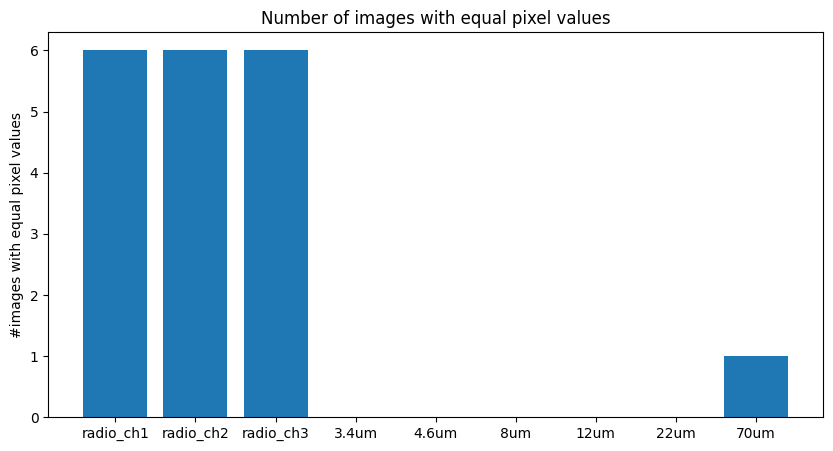

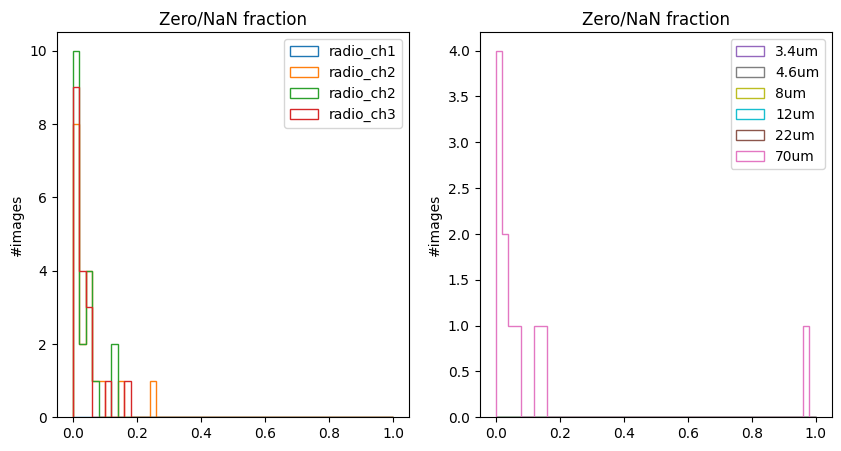

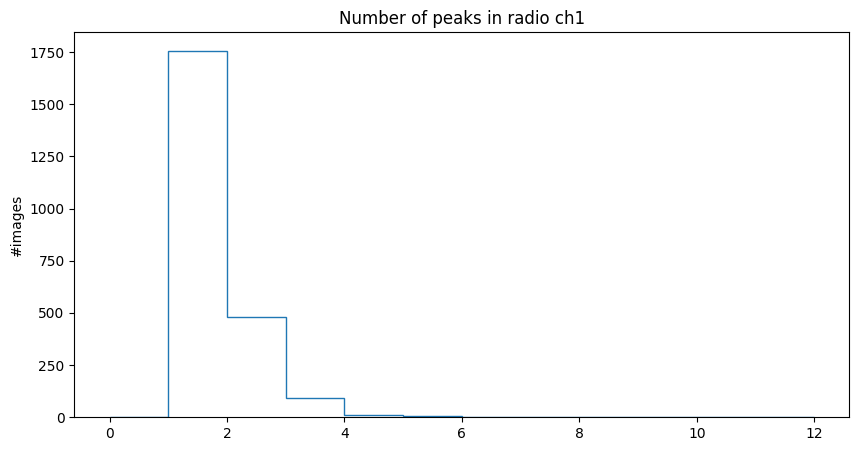

In [10]:
import os
import sys
import matplotlib.pyplot as plt
from sclassifier.utils import Utils
 
def draw_equalpix_imgs(table):
    """Draw equal pixel image plot"""
    
    # - Counts number of images with equal pixel values
    nchans= 10
    counts= [0] * nchans
    for item in table:
        for j in range(nchans):
            varname= 'equalPixValues_ch' + str(j+1)
            #print(varname)
            has_equal_pix= item[varname]
            if has_equal_pix:
                counts[j]+= 1
      
    print("Number of images per each channel with all equal pixel values")
    print(counts)
    
    # - Plot histogram        
    fig, ax = plt.subplots(figsize=(10, 5))
    labels= ["radio_ch1", "radio_ch2", "radio_ch2", "radio_ch3", "3.4um", "4.6um", "8um", "12um", "22um", "70um"]
    ax.bar(labels, counts)
    ax.set_ylabel('#images with equal pixel values')
    ax.set_title('Number of images with equal pixel values')
    
def draw_badpixel_fract(table):
    """Draw the fraction of bad pixel values per each image and channel """
    
    # - Counts number of images with equal pixel values
    nchans= 10
    data= []
    for j in range(nchans):
        varname= 'badPixFract_ch' + str(j+1)
        data_ch= []
        for item in table:
            var= item[varname]
            if var>0:
                data_ch.append(var)
        data.append(data_ch)
            
    # - Plot histogram
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5))
    
    labels= ["radio_ch1", "radio_ch2", "radio_ch2", "radio_ch3", "3.4um", "4.6um", "8um", "12um", "22um", "70um"]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
    plot_indices= [0,0,0,0,1,1,1,1,1,1]
    for j in range(nchans):
        ax[plot_indices[j]].hist(
            data[j], bins=50, range=(0,1), histtype='step', stacked=True, fill=False, density=False, 
            color=colors[j], label=labels[j]
        )
    
    ax[0].set_ylabel('#images')
    ax[0].legend(prop={'size': 10})
    ax[0].set_title('Zero/NaN fraction')
    
    ax[1].set_ylabel('#images')
    ax[1].legend(prop={'size': 10})
    ax[1].set_title('Zero/NaN fraction')
    
def draw_npeaks(table):
    """Draw the number of peaks in radio image """
    
    nchans= 10
    data= []
    for item in table:
        sname= item['sname']
        varname= 'npeaks_ch1'
        var= item[varname]
        if var>0:
            data.append(var)
        if var>5:
            print("--> %d peaks found in image %s ..." % (var, sname))
            
    # - Plot histogram
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.hist(data, bins=12, range=(0,12), histtype='step', stacked=False, fill=False, density=False) 
    ax.set_ylabel('#images')
    #ax.legend(prop={'size': 10})
    ax.set_title('Number of peaks in radio ch1')
    
    
# - Read stats_flags file
inputfile= "stats_flags_orig.dat"
inputfile_fullpath= os.path.join(datacheck_dir, inputfile)

print("Printing file top5 rows ...")
!head -n 5 {inputfile_fullpath}
print("")

print("Reading file %s ..." % (inputfile_fullpath))
t= Utils.read_ascii_table(inputfile_fullpath, delimiter=' ')

# - Plotting the number of images with equal pixel values
draw_equalpix_imgs(t)

# - Plotting the histogram of bad pixel fraction values
draw_badpixel_fract(t)

# - Plotting the number of peaks found in 1st radio channel
draw_npeaks(t)


Let's now read the `stats_info` file and plot some image stats per each channel.

Printing file top5 rows ...
# sname min_ch1 max_ch1 mean_ch1 std_ch1 min_ch2 max_ch2 mean_ch2 std_ch2 min_ch3 max_ch3 mean_ch3 std_ch3 min_ch4 max_ch4 mean_ch4 std_ch4 min_ch5 max_ch5 mean_ch5 std_ch5 min_ch6 max_ch6 mean_ch6 std_ch6 min_ch7 max_ch7 mean_ch7 std_ch7 min_ch8 max_ch8 mean_ch8 std_ch8 min_ch9 max_ch9 mean_ch9 std_ch9 min_ch10 max_ch10 mean_ch10 std_ch10 id
G001.856-00.499  -2.1992364e-06  2.4294974e-05  3.5001549048949096e-06  5.494781603173556e-06  -1.8757853e-06  2.1385902e-05  2.494440966490972e-06  5.395712189210174e-06  -3.14065e-07  2.2004488e-05  3.7888478717029786e-06  5.092871753100852e-06  -1.4021211e-06  2.1081618e-05  2.7815014187057138e-06  5.107073527495929e-06  0.00033679657  0.0013884899  0.0005523636338968132  0.00022000339667977293  0.00028678117  0.0012255745  0.000430828460511302  0.00016315488163243176  0.0018426084  0.0024845584  0.0019433687671181563  0.00010709976286228533  0.0021554648  0.0023710863  0.0022003831446543005  3.528517600351662e-05  0

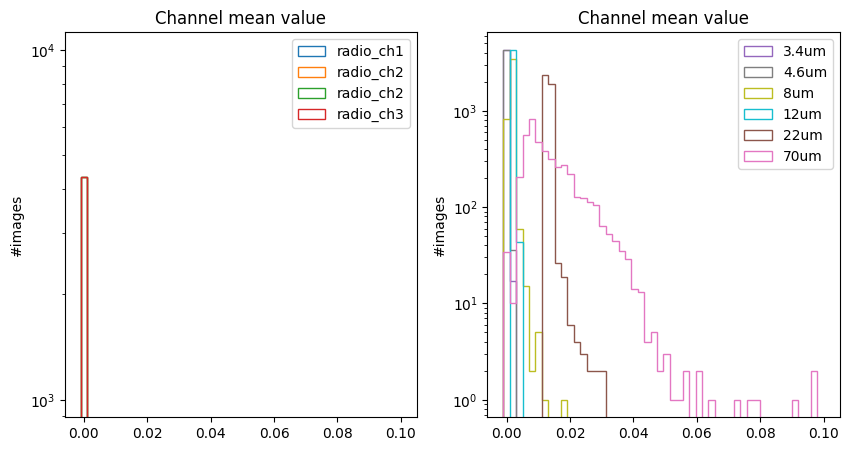

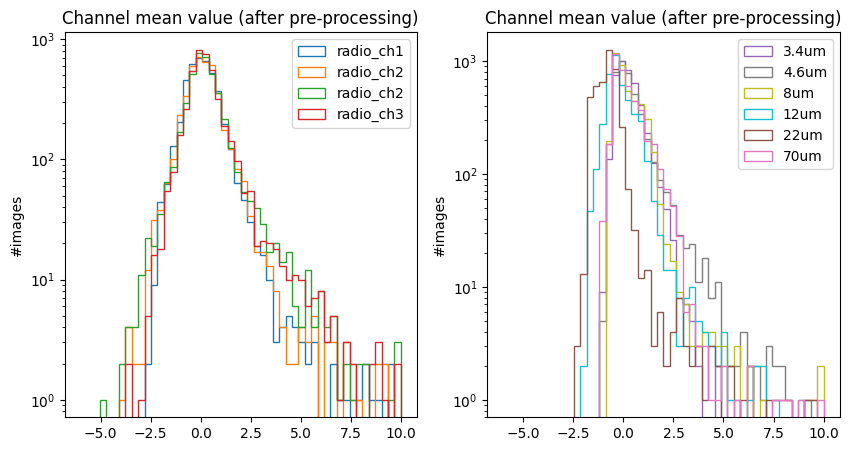

In [11]:
import os
import sys
import matplotlib.pyplot as plt
from sclassifier.utils import Utils

def draw_img_mean(table, title, xmin, xmax):
    """Draw the image mean per each image and channel """
    
    nchans= 10
    data= []
    for j in range(nchans):
        varname= 'mean_ch' + str(j+1)
        data_ch= []
        for item in table:
            var= item[varname]
            data_ch.append(var)
            #if var>0:
            #    lgvar= np.log10(var)
            #    data_ch.append(lgvar)
                
        data.append(data_ch)
        
    data_mins= [np.min(item) for item in data]
    data_maxs= [np.max(item) for item in data]
    data_abs_min= np.min(data_mins)
    data_abs_max= np.max(data_mins)
            
    # - Plot histogram
    fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5))
    
    labels= ["radio_ch1", "radio_ch2", "radio_ch2", "radio_ch3", "3.4um", "4.6um", "8um", "12um", "22um", "70um"]
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:gray', 'tab:olive', 'tab:cyan', 'tab:brown', 'tab:pink']
    plot_indices= [0,0,0,0,1,1,1,1,1,1]
    for j in range(nchans):
        #ax[plot_indices[j]].hist(
        #    data[j], histtype='step', stacked=True, fill=False, density=False, 
        #    bins=50, range=(-10, 2),
        #    color=colors[j], label=labels[j]
        #)
        ax[plot_indices[j]].hist(
            data[j], histtype='step', stacked=True, fill=False, density=False, 
            bins=50, range=(xmin,xmax),
            color=colors[j], label=labels[j]
        )
    
    ax[0].set_yscale('log')
    ax[0].set_ylabel('#images')
    ax[0].legend(prop={'size': 10})
    ax[0].set_title(title)
    
    ax[1].set_yscale('log')
    ax[1].set_ylabel('#images')
    ax[1].legend(prop={'size': 10})
    ax[1].set_title(title)
    
# - Read stats_flags file
inputfile= "stats_info_orig.dat"
inputfile_fullpath= os.path.join(datacheck_dir, inputfile)

print("Printing file top5 rows ...")
!head -n 5 {inputfile_fullpath}
print("")

print("Reading file %s ..." % (inputfile_fullpath))
t= Utils.read_ascii_table(inputfile_fullpath, delimiter=' ')

# - Plotting the image mean values
draw_img_mean(t, title='Channel mean value',xmin=-0.001, xmax=0.1)

# - Read stats_flags file after applying the pre-processing
inputfile= "stats_info_preproc.dat"
inputfile_fullpath= os.path.join(datacheck_dir, inputfile)

print("Reading file %s ..." % (inputfile_fullpath))
t= Utils.read_ascii_table(inputfile_fullpath, delimiter=' ')

# - Plotting the image mean values
draw_img_mean(t, 'Channel mean value (after pre-processing)', xmin=-6, xmax=10)


# Source Morphology Classification
In this section we will attempt to classify the morphological of unclassified radio sources using the following morphological class labels (taken from Radio Galaxy Zoo Wu+2019 work): `{1C-1P, 1C-2P, 1C-3P, 2C-2P, 2C-3P, 3C-3P}`.
The first digit 'C' denotes the number of disjoint components (or islands) present in the source, while the second digit 'P' represents the number of peaks present in the source (in all islands).

A CNN model (4 conv layers) was previously trained on the RGZ dataset and made available to predict the morphological class of sources present in our dataset. Note that the model was trained on sources observed with a different telescope and survey (VLA FIRST) with respect to our dataset (MeerKAT SMGPS). 

Let's download the pre-trained model architecture and weights.

In [12]:
import os
import gdown
import tarfile

# - Enter smorph class directory
os.chdir(smorph_class_dir)

# - Download and unzip model
if not os.path.isfile(model_smorph_filename):
    print("Downloading model from url %s ..." % (model_smorph_url))
    gdown.download(model_smorph_url, model_smorph_filename, quiet=False)
    print("DONE")
    
    print("Unzipping model file %s ..." % (model_smorph_filename))
    fp= tarfile.open(model_smorph_filename)
    fp.extractall('.')
    fp.close()
    print("DONE")
    
# - Return to main dir
os.chdir(topdir)

Downloading...
From: https://drive.google.com/uc?export=download&id=19BT_6zSiCVDoNkMenwJkNVmmge85TsW6
To: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/cnn_conv4_rgz_imgsize64_nepochs100.tar.gz
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 386k/386k [00:00<00:00, 4.86MB/s]

DONE
Unzipping model file cnn_conv4_rgz_imgsize64_nepochs100.tar.gz ...
DONE


The dataset `filelists` directory already has a pre-generated filelist file, named `filelist_all_radio_morphclass.json`, that we can use for the source classifier prediction step. We need to first modify the filelist for our local directory structure.

In [13]:
# - Enter top directory
os.chdir(topdir)

# - Set input data filelist provided in the dataset and adjust image path
inputfile= "filelist_all_radio_morphclass.json"
inputfile_fullpath= os.path.join(dataset_filelist_dir, inputfile)

modify_filelist(inputfile_fullpath)

Opening data filelist file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smgps-compact-source-dataset/filelists/filelist_all_radio_morphclass.json ...
Saving file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_all_radio_morphclass.json ...


We can now predict the morphology class of radio sources listed in the above filelist, using the pre-trained model.

In [14]:
import os
import sys

# - Enter smorph class directory
os.chdir(smorph_class_dir)

# - Set input file
inputfile= "filelist_all_radio_morphclass.json"
inputfile_fullpath= os.path.join(dataset_filelist_dir, inputfile)

# - Pre-trained model
modelfile= os.path.join(smorph_class_dir, model_smorph_dir + "model.h5")
model_weights= os.path.join(smorph_class_dir, model_smorph_dir + "model_weights.h5")

# - Run CNN predict
script_dir= sys.executable.replace("/python","")
exe= os.path.join(script_dir, "run_classifier_nn.py")

IMGSIZE=64
CLASSID_REMAP='{0:-1,1:0,2:1,3:2,4:3,5:4,6:5}'
TARGET_LABEL_MAP='{0:"1C-1P",1:"1C-2P",2:"1C-3P",3:"2C-2P",4:"2C-3P",5:"3C-3P"}'
CLASSID_LABEL_MAP='{1:"1C-1P",2:"1C-2P",3:"1C-3P",4:"2C-2P",5:"2C-3P",6:"3C-3P"}'
TARGET_NAMES="1C-1P,1C-2P,1C-3P,2C-2P,2C-3P,3C-3P"
NCLASSES=6

%run {exe} --datalist={inputfile_fullpath} \
    --resize_size={IMGSIZE} --upscale --zscale_stretch --zscale_contrasts=0.25 --normalize_minmax \
    --no-multiprocessing \
    --classid_remap='{CLASSID_REMAP}' --target_label_map='{TARGET_LABEL_MAP}' \
    --classid_label_map='{CLASSID_LABEL_MAP}' --target_names='{TARGET_NAMES}' \
    --nclasses={NCLASSES} --objids_excluded_in_train=-1,0 \
    --modelfile={modelfile} --weightfile={model_weights} \
    --predict

# - Return to main dir
os.chdir(topdir)

2024-03-18 09:48:02 INFO - Get script args ...
2024-03-18 09:48:02 INFO - Create train data pre-processor ...
2024-03-18 09:48:02 INFO - Creating data pre-processor for validation data ...
2024-03-18 09:48:02 INFO - Reading datalist /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smgps-compact-source-dataset/filelists/filelist_all_radio_morphclass.json ...
2024-03-18 09:48:02 INFO - #5871 objects in dataset
2024-03-18 09:48:02 INFO - Running CNN image classifier training ...
2024-03-18 09:48:02 INFO - Setting multi class targets ...
2024-03-18 09:48:02 INFO - Setting adam optimizer (no lr given) ...
2024-03-18 09:48:02 INFO - Setting input data from data loader ...
2024-03-18 09:48:02 INFO - #116 labelled sources found in dataset ...
2024-03-18 09:48:02 INFO - Creating data generators ...
2024-03-18 09:48:02 INFO - Creating validation data generator (deep-copying train data generator) ...


== class_probs ==
{'PN': 1, 'HII': 1, 'PULSAR': 1, 'YSO': 1, 'STAR': 1, 'GALAXY': 1, 'QSO': 1}
== classid_remap ==
{0: -1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}
== target_label_map ==
{0: '1C-1P', 1: '1C-2P', 2: '1C-3P', 3: '2C-2P', 4: '2C-3P', 5: '3C-3P'}
== classid_label_map ==
{1: '1C-1P', 2: '1C-2P', 3: '1C-3P', 4: '2C-2P', 5: '2C-3P', 6: '3C-3P'}
== PRE-PROCESSING STAGES (TRAIN) ==
[<sclassifier.preprocessing.ZScaleTransformer object at 0x7f353907b850>, <sclassifier.preprocessing.Resizer object at 0x7f3538a71580>, <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f3538a712b0>]
== PRE-PROCESSING STAGES (VAL) ==
[<sclassifier.preprocessing.ZScaleTransformer object at 0x7f353907b850>, <sclassifier.preprocessing.Resizer object at 0x7f3538a71580>, <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f3538a712b0>]
== TARGET NAMES ==
['1C-1P']


2024-03-18 09:48:02 INFO - Disabling data augmentation in validation data generator ...
2024-03-18 09:48:02 INFO - Creating test data generator (deep-copying train data generator) ...
2024-03-18 09:48:02 INFO - Disabling data augmentation in test data generator ...
2024-03-18 09:48:02 INFO - Loading model architecture and weights from files /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/cnn_conv4_rgz_imgsize64_nepochs100/model.h5 /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/cnn_conv4_rgz_imgsize64_nepochs100/model_weights.h5 ...
2024-03-18 09:48:02 INFO - Loading model from file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/cnn_conv4_rgz_imgsize64_nepochs100/model.h5 ...
2024-03-18 09:48:02 INFO - Loading model weights from file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/cnn_conv4_rgz_imgsize64_nepochs100/model_weights.h5 ...


== custom_objects ==
{'recall_metric': <function recall_metric at 0x7f35e4bf24c0>, 'precision_metric': <function precision_metric at 0x7f3538a54160>, 'f1score_metric': <function f1score_metric at 0x7f3538a541f0>}


2024-03-18 09:48:02 INFO - Predicting model output data ...
2024-03-18 09:48:02 INFO - Starting data generator ...


5871/5871 - 79s - 79s/epoch - 13ms/step


2024-03-18 09:49:22 INFO - Saving predicted data to file ...
2024-03-18 09:49:22 INFO - Retrieving target ids from predicted output ...
2024-03-18 09:49:22 INFO - Computing predicted class ids from targets ...
2024-03-18 09:49:22 INFO - Predicting output classid ...
2024-03-18 09:49:22 INFO - Saving prediction data to file classified_data.dat ...
2024-03-18 09:49:22 INFO - Compute and save metrics ...
2024-03-18 09:49:22 INFO - Computing classification metrics on predicted data ...
2024-03-18 09:49:22 INFO - accuracy=0.000000
2024-03-18 09:49:22 INFO - precision=1.000000
2024-03-18 09:49:22 INFO - recall=0.767241
2024-03-18 09:49:22 INFO - f1score=0.868293
2024-03-18 09:49:22 INFO - --> Metrics per class
2024-03-18 09:49:22 INFO - Retrieving confusion matrix ...
2024-03-18 09:49:22 INFO - Saving metrics to file metrics.dat ...
2024-03-18 09:49:22 INFO - Saving confusion matrix to file confusion_matrix.dat ...


predout
<class 'numpy.ndarray'>
(5871, 6)
targets_pred
[3 0 0 ... 3 0 0]
<class 'numpy.ndarray'>
(5871,)
classids_pred
[4, 1, 1, 2, 1, 1, 3, 1, 4, 1, 2, 1, 4, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 3, 1, 4, 2, 1, 3, 1, 5, 1, 3, 5, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 5, 6, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 4, 4, 1, 4, 1, 4, 1, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 4, 1, 4, 1, 1, 4, 1, 1, 4, 4, 1, 4, 1, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 1, 4, 5, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 4, 1, 1, 1, 1, 1

CNN prediction data for each source have been saved to file `classified_data.dat`. This contains the following data columns:

- `sname`: Source name
- `id`: Ground truth source classification ID (=1 for sources previously classified as `1C-1P`, =0 for unclassified)
- `id_pred`: Predicted source classification ID
- `prob`: Classification probability
    
Let's plot an histogram of predicted classification IDs.

2024-03-18 11:04:41 INFO - sclassifier v1.0.5 (2024-03-14)
2024-03-18 11:04:43 INFO - This is scutout 1.0.3-(2019-05-29)


Printing file top5 rows ...
# sname id id_pred prob
G001.457+00.505  1  4  0.51478934
G001.460+00.512  1  1  0.37880582
G002.483+01.188  1  1  0.96586734
G001.753-00.347  1  2  0.43390545

Reading file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/classified_data.dat ...
Number of sources per predicted id
[4408, 29, 14, 1392, 25, 3]


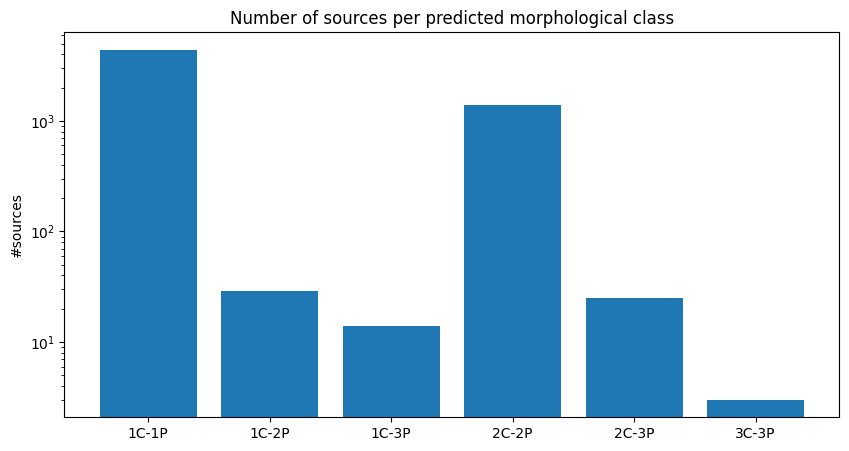

In [2]:
#%matplotlib inline
import os
import sys
import matplotlib.pyplot as plt
from sclassifier.utils import Utils
 
def draw_pred_ids(table):
    """Draw predicted source morph IDs"""
    
    # - Counts number of images with equal pixel values
    nclasses= 6
    counts= [0] * nclasses
    for item in table:
        id_pred= item["id_pred"]
        counts[id_pred-1]+= 1
    
    print("Number of sources per predicted id")
    print(counts)
    
    # - Plot histogram        
    fig, ax = plt.subplots(figsize=(10, 5))
    labels= ["1C-1P", "1C-2P", "1C-3P", "2C-2P", "2C-3P", "3C-3P"]
    ax.bar(labels, counts)
    ax.set_ylabel('#sources')
    ax.set_yscale('log')
    ax.set_title('Number of sources per predicted morphological class')
    
    
# - Read classifier output file
inputfile= "classified_data.dat"
inputfile_fullpath= os.path.join(smorph_class_dir, inputfile)

print("Printing file top5 rows ...")
!head -n 5 {inputfile_fullpath}
print("")

print("Reading file %s ..." % (inputfile_fullpath))
t= Utils.read_ascii_table(inputfile_fullpath, delimiter=' ')

# - Plotting the predicted ids
draw_pred_ids(t)

We generate all files needed by `pixplotml` (see next section).

In [16]:
import os
import sys
import shutil
import csv
from astropy.io import ascii
from sclassifier.utils import Utils

def modify_metadata_morph(t, t_meta, prob_thr, outfile):
    """Modify metadata replacing physical class labels with morph labels"""

    # - Class id-label map
    class_id_map= {
        0: "UNKNOWN",
        1: "1C-1P",
        2: "1C-2P",
        3: "1C-3P",
        4: "2C-2P",
        5: "2C-3P",
        6: "3C-3P"
    }
    
    # - Create sname dict
    class_dict= {}
    for item in t:
        sname= item["sname"]
        id_true= item["id"]
        id_pred= item["id_pred"]
        prob= item["prob"]
        id_final= 0
        if id_true!=0:
            id_final= id_pred
        else:
            if prob>=prob_thr:
                id_final= id_pred
        label= class_id_map[id_final]
        class_dict[sname]= label
        
    # - Set class morph labels and save
    fout= open(outfile, 'w', newline='')
    writer = csv.writer(fout)
    
    # - Write header
    field = ["filename", "category"]
    writer.writerow(field)

    # - Modify labels
    for item in t_meta:
        filename= item["filename"]
        filename_base= os.path.basename(filename)
        sname= os.path.splitext(filename_base)[0]
        label_new= "UNKNOWN"
        if sname in class_dict:
            label_new= class_dict[sname]
        writer.writerow([filename, label_new])
    
    fout.close()
    

# - Enter smorph class directory
os.chdir(smorph_class_dir)

# - Copy original metadata file to smorph directory
#   NB: Original metadata have physical class labels (e.g. HII, PN, etc), but we want to create a metadata file
#       with morphological labels (as predicted by the above classifier)
filename= os.path.join(dataset_filelist_dir, "metadata_radio.csv")
filename_dest= os.path.join(smorph_class_dir, "metadata_radio_morphclass.csv")
shutil.copyfile(filename, filename_dest)

# - Read classifier output file
inputfile= "classified_data.dat"
inputfile_fullpath= os.path.join(smorph_class_dir, inputfile)
print("Reading file %s ..." % (inputfile_fullpath))
t= Utils.read_ascii_table(inputfile_fullpath, delimiter=' ')

# - Read metadata file
print("Reading file %s ..." % (filename_dest))
t_meta= ascii.read(filename_dest)

# - Set morph classification data
#   NB: Override previously copied file
PROB_THR= 0.8
modify_metadata_morph(t, t_meta, PROB_THR, outfile=filename_dest)

# - Return to main dir
os.chdir(topdir)

Reading file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/classified_data.dat ...
Reading file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/smorph_class/metadata_radio_morphclass.csv ...


# Autoencoder Analysis
A convolutional autoencoder is a type of neural network architecture that consists of two convolutional neural network blocks (see schema below): 

- the "encoder" extracts features from the input images and reduce their dimensionality, ultimately producing a compressed latent representation.
- the "decoder" then uses transposed convolutional layers to upsample the latent representation, reconstructing the original input by decoding the compressed features back into their original space.


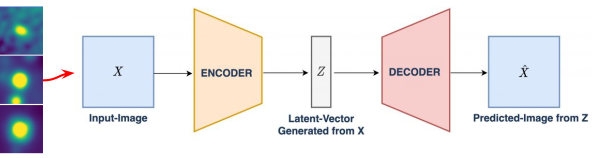

In this section we show how to use a convolutional autoencoder model on both the radio and multi-wavelength source data that were previously downloaded. 

We will run two autoencoder analysis:

1) Extract a data representation from radio data only (1-channel) to study the source radio morphology in an unsupervised way, validating the classification that we have obtained with the supervised CNN analysis (see above);
2) Extract a data representation from multiwavelength data (10-channels) to study the source astronomical nature in an unsupervised way.


## Radio Morphology Analysis

### Pre-trained model
We first download an autoencoder model that we have previously trained on the radio dataset for 100 epochs.

In [17]:
import os
import sys
import gdown
import tarfile

# - Entering run directory
os.chdir(cae_radio_dir)

# - Download model
if not os.path.isfile(model_cae_radio_filename):
    print("Downloading model from url %s ..." % (model_cae_radio_url))
    gdown.download(model_cae_radio_url, model_cae_radio_filename, quiet=False)
    print("DONE")
    
    print("Unzipping model file %s ..." % (model_cae_radio_filename))
    fp= tarfile.open(model_cae_radio_filename)
    fp.extractall('.')
    fp.close()
    print("DONE")
    
# - Entering top directory
os.chdir(topdir)

Downloading...
From: https://drive.google.com/uc?export=download&id=1v598NslPu4-nnFRGS4iV4ab7UHW--r7J
To: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100.tar.gz
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9.15M/9.15M [00:00<00:00, 12.6MB/s]

DONE
Unzipping model file cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100.tar.gz ...
DONE


Let's plot the autoencoder loss as a function of the trained epochs.

Printing file top5 rows ...
# epoch loss loss_val
1.0  0.02294457145035267  0.0
2.0  0.004477840382605791  0.0
3.0  0.0026624451857060194  0.0
4.0  0.0020542917773127556  0.0

Reading loss file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100/losses.dat ...


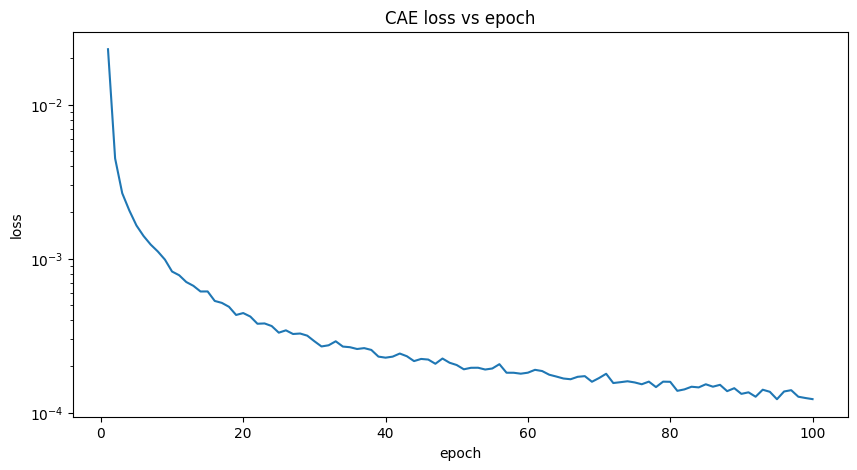

In [3]:
#%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
from sclassifier.utils import Utils

def draw_loss_vs_epoch(table):
    """Draw the model loss vs epochs"""
    
    # - Read loss data
    losses= []
    epochs= []
    for item in table:
        losses.append(item["loss"])
        epochs.append(item["epoch"])
          
    # - Plot graph
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_yscale('log')
    ax.plot(epochs, losses)
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.set_title("CAE loss vs epoch")
    
    
# - Enter run directory
os.chdir(cae_radio_dir)

# - Read loss file
filename= "losses.dat"
filename_fullpath= os.path.join(cae_radio_dir, model_cae_radio_dir + filename)

print("Printing file top5 rows ...")
!head -n 5 {filename_fullpath}
print("")

print("Reading loss file %s ..." % (filename_fullpath))
t= Utils.read_ascii_table(filename_fullpath, delimiter=' ')

# - Draw losses vs epochs
draw_loss_vs_epoch(t)

# - Enter top directory
os.chdir(topdir)

Let's plot the autoencoder reconstruction accuracy for all images. We will use the Structural similarity index (SSIM) to quantify the similarity (in range [-1,1], where 1 is perfect similarity) between input and recontructed radio images.

Printing file top5 rows ...
# sname mse_ch1 ssim_mean_ch1 ssim_min_ch1 ssim_max_ch1 ssim_std_ch1 id
G001.457+00.505  0.00027338086991616936  0.9771852977973301  0.13986716940015573  0.9998248050327806  0.05930367115966886  3
G001.460+00.512  0.002569352865809363  0.8571175276492152  0.038721738789674054  0.9981032626624354  0.17356067198147407  3
G002.483+01.188  0.0009956069055663194  0.8968838190995431  0.10754133100458596  0.9999999466922954  0.12109844243260752  3
G001.753-00.347  0.0019375007560225848  0.8379320090537129  -0.27451775759872377  0.9999988968132386  0.16495116133791318  3

Reading reco metrics file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/cae_radio_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch100/reco_metrics.dat ...


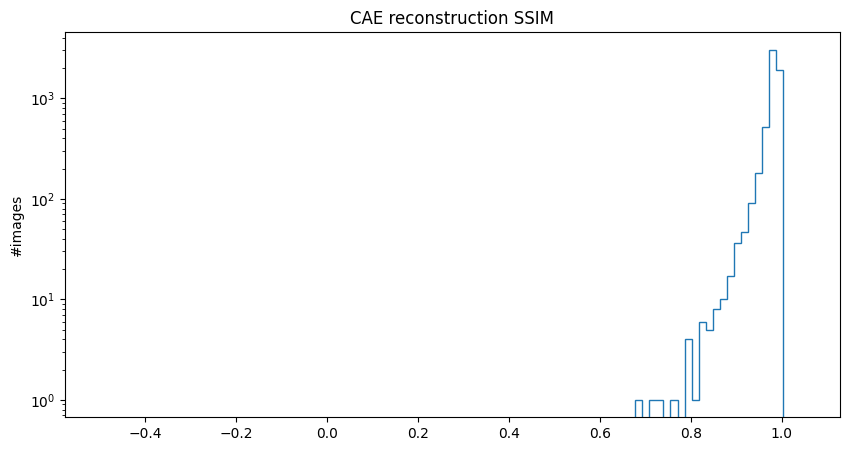

In [4]:
#%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
from sclassifier.utils import Utils

def draw_reco_metrics(table):
    """Draw the model reco metrics"""
    
    # - Read SSIM data
    ssims= []
    for item in table:
        ssims.append(item["ssim_mean_ch1"])
        
    # - Plot histogram
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.hist(
        ssims, histtype='step', stacked=True, fill=False, density=False, 
        bins=100, range=(-0.5,1.05)
    )
    ax.set_yscale('log')
    ax.set_ylabel('#images')
    ax.set_title("CAE reconstruction SSIM")
    

# - Enter run directory
os.chdir(cae_radio_dir)

# - Read loss file
filename= "reco_metrics.dat"
filename_fullpath= os.path.join(cae_radio_dir, model_cae_radio_dir + filename)

print("Printing file top5 rows ...")
!head -n 5 {filename_fullpath}
print("")

print("Reading reco metrics file %s ..." % (filename_fullpath))
t= Utils.read_ascii_table(filename_fullpath, delimiter=' ')

# - Draw losses vs epochs
draw_reco_metrics(t)

# - Enter top directory
os.chdir(topdir)

### Inspecting the latent space
The data low-dimensional representation obtained with the trained CAE is saved in file `latent_data.dat`. Let's try to inspect it with `pixplotml`. For this, we need to first adapt the produced autoencoder latent space file for pixplot format.

In [20]:
import numpy as np
from sclassifier.utils import Utils

def save_latent_space_to_npy(filename, outfile):
    """Convert latent space file to npy format """
    
    # - Read feature data file
    ret= Utils.read_feature_data(filename)
    data= ret[0]
    
    # - Save data to npy
    np.save(outfile, data)
    
# - Entering cae directory
print("Entering run dir %s ..." % (cae_radio_dir))
os.chdir(cae_radio_dir)

# - Set input file
inputfile= "latent_data.dat"
inputfile_fullpath= os.path.join(cae_radio_dir, model_cae_radio_dir + inputfile)

# - Save latent file to npy 
outfile_fullpath= os.path.join(cae_radio_dir, "latent_data.npy")
print("Saving latent data to file %s ..." % (outfile_fullpath))
save_latent_space_to_npy(inputfile_fullpath, outfile_fullpath)

# - Enter top directory
os.chdir(topdir)

Entering run dir /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio ...
Saving latent data to file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/latent_data.npy ...
['sname', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39', 'z40', 'z41', 'z42', 'z43', 'z44', 'z45', 'z46', 'z47', 'z48', 'z49', 'z50', 'z51', 'z52', 'z53', 'z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z60', 'z61', 'z62', 'z63', 'z64', 'id']


We now generate pixplotml files for web interactive visualization using `pixplot.py` script provided in the `pixplotml` repo. We modified this script in the forked repo to accept a preview filelist. The script needs 3 input files that we already created:
- latent space features (npy format)
- metadata (csv format)
- image preview filelist (ascii format) 

In [21]:
# - Enter top directory
os.chdir(cae_radio_dir)

# - Generate pixplotml data
MINDIST=0.1
NNEIGHBORS=10
metadata_path= os.path.join(smorph_class_dir, "metadata_radio_morphclass.csv")
latentdata_path= os.path.join(cae_radio_dir, "latent_data.npy")
imagepreview_path= os.path.join(datalist_dir, "filelist_previews_radio.dat")
outdir= "pixplotml"

script= "pixplot.py"
exe= os.path.join(pixplotml_dir, "pixplot_server/pixplot/" + script)
print("Executing script %s ..." % (exe))
%run {exe} --metadata={metadata_path} --image_vectors={latentdata_path} --images={imagepreview_path} \
    --n_neighbors={NNEIGHBORS} --min_dist={MINDIST} \
    --out_dir={outdir}

# - Enter top directory
os.chdir(topdir)

Executing script /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/pixplotml/pixplot_server/pixplot/pixplot.py ...
Mtnse
2024-03-18 09:49:32.881438: CUML not available; using umap-learn UMAP
Reading path: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/pixplotml/index.html
Reading path: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/radio/pixplotml/assets/js/tsne.js
2024-03-18 09:49:42.797836: Creating atlas files
2024-03-18 09:49:57.330965: Creating single umap layout
2024-03-18 09:50:22.587138: Creating umap pointgrid
2024-03-18 09:50:28.686365: Creating grid layout
2024-03-18 09:50:31.859553: Clustering data with hdbscan
2024-03-18 09:50:34.473262: Found 5 hotspots
2024-03-18 09:52:02.907836: Done!


Enter the cae radio directory and launch a web server on your terminal by running:

`$ python -m http.server 8600`

Then, open a web browser to:

`http://localhost:8600/output`

and have a look at the UMAP projections with image previews generated by pixplot.

## Multi-wavelength Analysis

### Pre-trained model
We first download an autoencoder model that we have previously trained on the multiwavelength dataset for 200 epochs.

In [22]:
import os
import sys
import gdown
import tarfile

# - Entering run directory
os.chdir(cae_multiwavelength_dir)

# - Download model
if not os.path.isfile(model_cae_multiwavelength_filename):
    print("Downloading model from url %s ..." % (model_cae_multiwavelength_url))
    gdown.download(model_cae_multiwavelength_url, model_cae_multiwavelength_filename, quiet=False)
    print("DONE")
    
    print("Unzipping model file %s ..." % (model_cae_multiwavelength_filename))
    fp= tarfile.open(model_cae_multiwavelength_filename)
    fp.extractall('.')
    fp.close()
    print("DONE")
    
# - Entering top directory
os.chdir(topdir)

Downloading...
From: https://drive.google.com/uc?export=download&id=1ug-NSSs3UHF4AXOE_cLfePSZUo_NZ-3f
To: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200.tar.gz
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10.4M/10.4M [00:00<00:00, 12.7MB/s]


DONE
Unzipping model file cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200.tar.gz ...
DONE


Let's plot the autoencoder loss as a function of the trained epochs.

Printing file top5 rows ...
# epoch loss loss_val
1.0  0.07260697335004807  0.0
2.0  0.04528113827109337  0.0
3.0  0.03560592234134674  0.0
4.0  0.03171132504940033  0.0

Reading loss file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/losses.dat ...


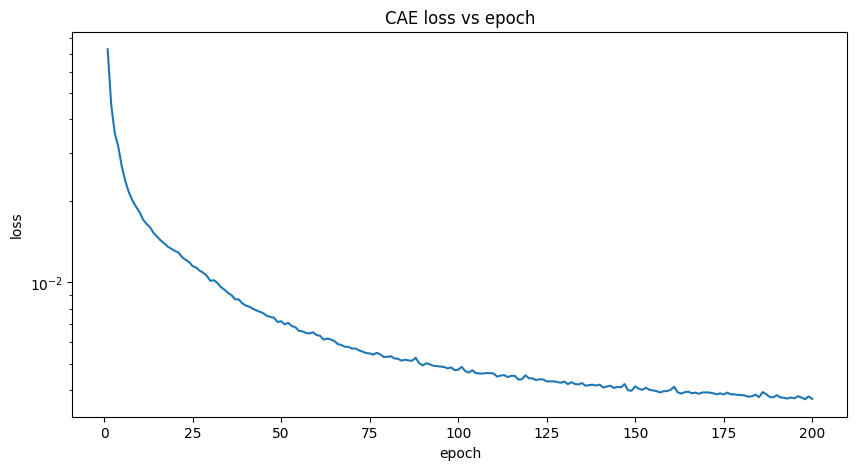

In [5]:
#%matplotlib inline
import sys
import os
import matplotlib.pyplot as plt
from sclassifier.utils import Utils
    
# - Enter run directory
os.chdir(cae_multiwavelength_dir)

# - Read loss file
filename= "losses.dat"
filename_fullpath= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + filename)

print("Printing file top5 rows ...")
!head -n 5 {filename_fullpath}
print("")

print("Reading loss file %s ..." % (filename_fullpath))
t= Utils.read_ascii_table(filename_fullpath, delimiter=' ')

# - Draw losses vs epochs
draw_loss_vs_epoch(t)

# - Enter top directory
os.chdir(topdir)

Let's plot the autoencoder reconstruction accuracy for all images. We will use the Structural similarity index (SSIM) to quantify the similarity (in range [-1,1], where 1 is perfect similarity) between input and recontructed radio images.

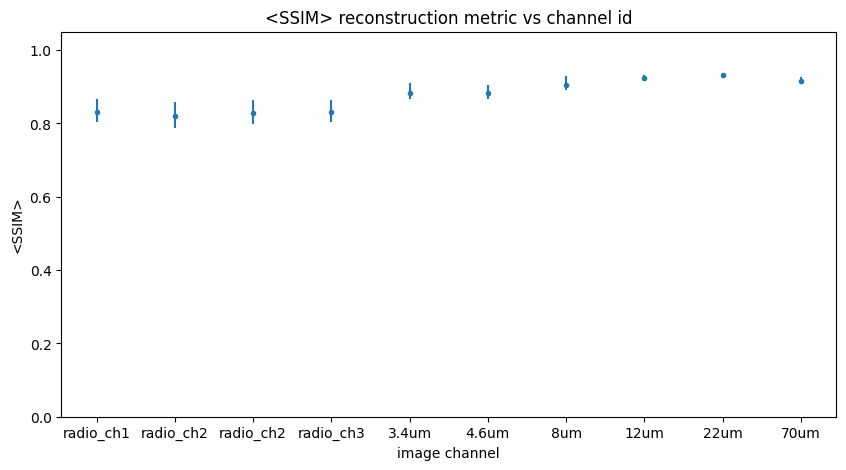

In [6]:
import sys
import os
import numpy as np
from astropy.io import ascii
import matplotlib.pyplot as plt

def draw_multichan_reco_metrics(inputfile):
    """Read and draw CAE reconstruction metrics"""

    # - Read metrics table
    t= ascii.read(inputfile)
    
    # - Read SSIM metric data
    ssim_medians= []
    nchans= 10
    chids= []
    ssim_errs= []
    labels= ["radio_ch1", "radio_ch2", "radio_ch2", "radio_ch3", "3.4um", "4.6um", "8um", "12um", "22um", "70um"]
    
    for k in range(nchans):
        varName= "ssim_mean_ch" + str(k+1)
        x= t[varName].data
        median= np.median(x)
        q75, q25 = np.percentile(x, [75,25])
        err_up= q75 - median
        err_low= median - q25
        err= (err_up, err_low)
        ssim_medians.append(median)
        ssim_errs.append(err)
        chids.append(k+1)
        
    # - Plot graph
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.errorbar(chids, ssim_medians, yerr=np.array(ssim_errs).T, fmt='.')
    ax.set_xticks(chids, labels)
    ax.set_xlabel('image channel')
    ax.set_ylabel('<SSIM>')
    ax.set_ylim(0,1.05)
    ax.set_title("<SSIM> reconstruction metric vs channel id")
    
# - Read and draw reconstruction metrics
inputfile= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + "reco_metrics.dat")
draw_multichan_reco_metrics(inputfile)

# - Enter top directory
os.chdir(topdir)

### Inspecting the latent space
The data low-dimensional representation obtained with the trained CAE is saved in file `latent_data.dat`. We now inspect the latent space vector by projecting it to 2D using UMAP dimensionality reduction algorithm. 
For this task, we will use the `run_umap_py` script provided in the `sclassifier` module.

In [8]:
#%matplotlib inline
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii

# - Entering run directory
print("Entering run dir %s ..." % (cae_multiwavelength_dir))
os.chdir(cae_multiwavelength_dir)

# - Set input file
inputfile= "latent_data.dat"
inputfile_fullpath= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + inputfile)

# - Run UMAP
script_dir= sys.executable.replace("/python","")
exe= os.path.join(script_dir, "run_umap.py")

MINDIST=0.8
NNEIGHBORS=20

print("Running UMAP (mindist=%d, nn=%d) on file %s ..." % (MINDIST, NNEIGHBORS, inputfile_fullpath))
%run {exe} --inputfile={inputfile_fullpath} --latentdim_umap=2 \
    --mindist_umap={MINDIST} --nneighbors_umap={NNEIGHBORS} \
    --normalize --objids_excluded_in_train=-1

# - Enter top directory
os.chdir(topdir)

Entering run dir /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength ...
Running UMAP (mindist=0, nn=20) on file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/latent_data.dat ...


2024-03-18 11:09:23.824377: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-18 11:09:23.842487: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 11:09:23.984432: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-18 11:09:23.985803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-18 11:09:24.709554: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

['sname', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39', 'z40', 'z41', 'z42', 'z43', 'z44', 'z45', 'z46', 'z47', 'z48', 'z49', 'z50', 'z51', 'z52', 'z53', 'z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z60', 'z61', 'z62', 'z63', 'z64', 'id']
== INPUT DATA MIN/MAX ==
[-4.311986  -2.9088352 -2.5165367 -3.325919  -3.4501376 -3.6244454
 -6.2243395 -4.1915135 -3.2712998 -3.4185135 -2.4615724 -4.6767464
 -3.6986108 -3.1303558 -2.9510586 -3.6549792 -3.9838314 -4.617699
 -3.3203363 -6.5482125 -2.7722733 -3.9267838 -7.145551  -3.740181
 -3.8547342 -4.596076  -3.9880664 -2.934564  -4.2110524 -2.9555843
 -4.2682505 -4.311005  -2.9682472 -2.3495138 -2.592453  -3.8455489
 -3.2842817 -3.0648189 -3.1801784 -3.8281817 -3.2729313 -3.5277379
 -3.7785738 -2.2695305 -1.9053559 -3.4168825 -3.89714

2024-03-18 11:09:51 INFO - Fitting input data in a completely unsupervised way ...
2024-03-18 11:09:57 INFO - Dumping model to file umap_model.sav ...
2024-03-18 11:10:05 INFO - Encode input data using learned transform on pre-classified data ...
2024-03-18 11:10:05 INFO - Saving unsupervised encoded data to file ...
2024-03-18 11:10:05 INFO - Saving supervised encoded data to file ...
2024-03-18 11:10:05 INFO - Saving pre-classified encoded data to file ...


Unsupervised encoded data shape= (4319, 2)
Unsupervised encoded data N= 4319
Supervised encoded data shape= (4319, 2)
Supervised encoded data N= 4319
Pre-classified encoded data shape= (4319, 2)
Pre-classified encoded data N= 4319


Let's plot the 2D projection produced by UMAP.

     sname          z1          z2      id
--------------- ---------- ----------- ---
G001.856-00.499 13.5523615  -10.562048   3
G003.707+01.164  11.131494  -11.548939   3
G001.731+00.444  12.383755   -9.587899   3
G003.826+00.385  13.828783   -6.681764   3
G003.828+00.538  13.691166  -5.8680744   3
G003.654-00.669  11.822285  -8.9456005   3
G001.733+00.767   14.13776  -7.6569457   3
G003.651-00.251   5.430948  -10.784954   3
G003.557+01.354  13.838277   -7.411762   3
G003.431-01.072  11.752044  -5.0475607   3
G003.728-00.385  4.8019814  -7.1530676   3
G003.310+01.034   13.33488   -9.119982   3
G002.252+00.554  14.674211   -7.758055   3
G002.012+00.744  12.374974  -10.540856   3
G002.483+01.188  14.544818   -8.312291   3
G001.996+00.197  6.5779204  -7.0551023   3
G001.868-00.534  13.208812   -7.601846   3
G003.723+00.547  13.768344   -7.375704   3
G002.748-01.201  13.821234   -8.435146   3
G001.753-00.347  14.633618   -8.133897   3
G003.794-00.815   3.619728   -2.737203   3
G003.329+01

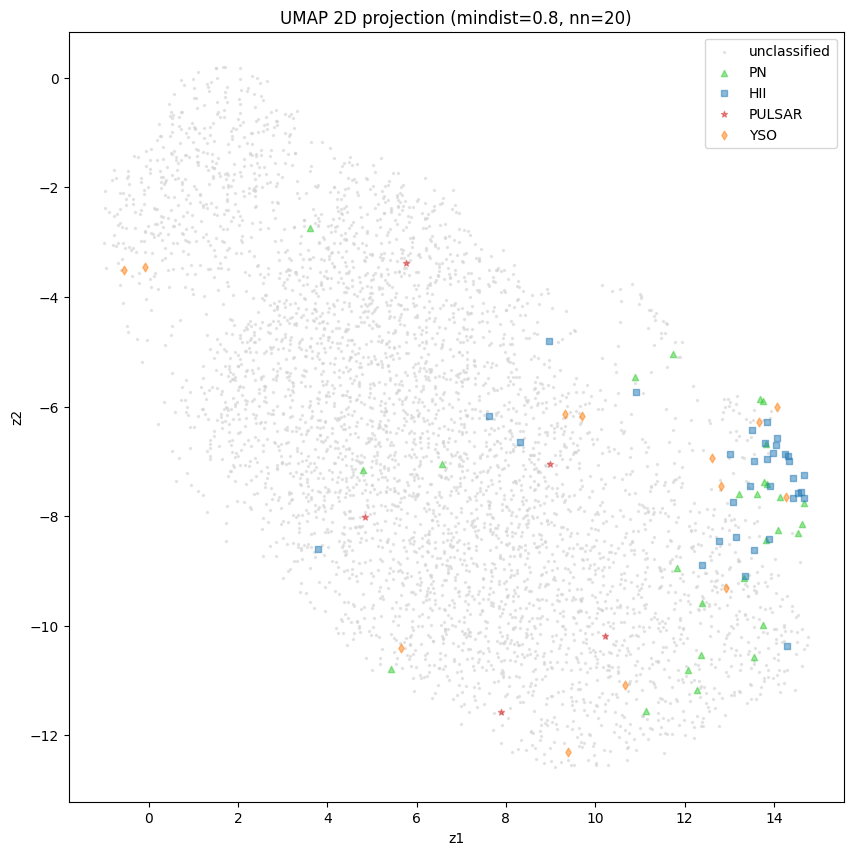

In [13]:
#%matplotlib inline
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii

def draw_umap_proj(filename, mindist, nn):
    """Draw UMAP projection"""
    
    # - Read ascii table
    t= ascii.read(filename, delimiter=' ')
    print(t)
    
    # - Create panda frame from astorpy table
    df= t.to_pandas()
    print(df)
    
    # - Extract sub frame per each class id
    class_ids= [0, 3, 6, 23, 24]
    dfs= []
    for class_id in class_ids:
        df_classid= df[df.id==class_id]
        dfs.append(df_classid)
        print(df_classid)
    
    # - Draw plot
    labels= ["unclassified", "PN", "HII", "PULSAR", "YSO"]
    marker_colors= ["lightgray", "limegreen", "tab:blue", "tab:red", "tab:orange"]
    marker_types= ["o", "^", "s", "*", "d"]
    marker_transp= [0.5, 0.5, 0.5, 0.5, 0.5]
    marker_sizes= [2, 20, 20, 20, 20]
    
    print("Draw UMAP scatter plot ...")
    fig, ax = plt.subplots(figsize=(10, 10))
    for i in range(len(class_ids)):
        ax.scatter(
            dfs[i].z1, dfs[i].z2, 
            s=marker_sizes[i], 
            c=marker_colors[i], 
            marker=marker_types[i], 
            alpha=marker_transp[i],
            label=labels[i]
        )
        
    ax.set_xlabel('z1')
    ax.set_ylabel('z2')
    ax.legend()
    ax.legend(prop={'size': 10})
    title= "UMAP 2D projection (mindist={0}, nn={1})".format(mindist, nn)
    ax.set_title(title)
    
    print("DONE")
    
# - Read projection data file
filename= "latent_data_umap_unsupervised.dat"
filename_fullpath= os.path.join(cae_multiwavelength_dir, filename)

# - Draw projection data
draw_umap_proj(filename_fullpath, MINDIST, NNEIGHBORS)

# - Enter top directory
os.chdir(topdir)

Let's try to view the produced latent space with `pixplotml`. For this, we need to first adapt the produced autoencoder latent space file for pixplot format.

In [26]:
import numpy as np
from sclassifier.utils import Utils

# - Entering cae directory
print("Entering run dir %s ..." % (cae_dir))
os.chdir(cae_multiwavelength_dir)

# - Set input file
inputfile= "latent_data.dat"
inputfile_fullpath= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + inputfile)

# - Save latent file to npy 
outfile_fullpath= os.path.join(cae_multiwavelength_dir, "latent_data.npy")
print("Saving latent data to file %s ..." % (outfile_fullpath))
save_latent_space_to_npy(inputfile_fullpath, outfile_fullpath)

# - Enter top directory
os.chdir(topdir)

Entering run dir /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae ...
Saving latent data to file /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/latent_data.npy ...
['sname', 'z1', 'z2', 'z3', 'z4', 'z5', 'z6', 'z7', 'z8', 'z9', 'z10', 'z11', 'z12', 'z13', 'z14', 'z15', 'z16', 'z17', 'z18', 'z19', 'z20', 'z21', 'z22', 'z23', 'z24', 'z25', 'z26', 'z27', 'z28', 'z29', 'z30', 'z31', 'z32', 'z33', 'z34', 'z35', 'z36', 'z37', 'z38', 'z39', 'z40', 'z41', 'z42', 'z43', 'z44', 'z45', 'z46', 'z47', 'z48', 'z49', 'z50', 'z51', 'z52', 'z53', 'z54', 'z55', 'z56', 'z57', 'z58', 'z59', 'z60', 'z61', 'z62', 'z63', 'z64', 'id']


We now generate pixplotml files for web interactive visualization using `pixplot.py` script provided in the `pixplotml` repo. We modified this script in the forked repo to accept a preview filelist. The script needs 3 input files that we already created:
- latent space features (npy format)
- metadata (csv format)
- image preview filelist (ascii format) 

In [27]:
# - Enter top directory
os.chdir(cae_multiwavelength_dir)

# - Generate pixplotml data
MINDIST=0.8
NNEIGHBORS=20
metadata_path= os.path.join(datalist_dir, "metadata_masked.csv")
latentdata_path= os.path.join(cae_multiwavelength_dir, "latent_data.npy")
imagepreview_path= os.path.join(datalist_dir, "filelist_previews.dat")
outdir="pixplotml"

script= "pixplot.py"
exe= os.path.join(pixplotml_dir, "pixplot_server/pixplot/" + script)
print("Executing script %s ..." % (exe))
%run {exe} --metadata={metadata_path} --image_vectors={latentdata_path} --images={imagepreview_path} \
    --n_neighbors={NNEIGHBORS} --min_dist={MINDIST} \
    --out_dir={outdir}

# - Enter top directory
os.chdir(topdir)

Executing script /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/pixplotml/pixplot_server/pixplot/pixplot.py ...
Mtnse
2024-03-18 09:52:49.733701: CUML not available; using umap-learn UMAP
Reading path: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/pixplotml/index.html
Reading path: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/pixplotml/assets/js/tsne.js
2024-03-18 09:52:59.811344: Creating atlas files
2024-03-18 09:53:10.029448: Creating single umap layout
2024-03-18 09:53:17.454197: Creating umap pointgrid
2024-03-18 09:53:21.544308: Creating grid layout
2024-03-18 09:53:23.687020: Clustering data with hdbscan
2024-03-18 09:53:25.028472: Found 2 hotspots
2024-03-18 09:54:27.301195: Done!


Enter the cae multiwavelength directory and launch a web server on your terminal by running: 

`$ python -m http.server 8600`

Then, open a web browser to:

`http://localhost:8600/output`

and have a look at the UMAP projections with image previews generated by pixplot. 

### CAE model training
We now train the autoencoder for a few epochs using the pre-trained model as initialization model.

We will use the training data filelist (.json format) previously created as input file.
For running the autoencoder analysis we will use the `run_ae.py` script provided in the `sclassifier` python module. Below we report a list of all supported command line options.

In [28]:
import sys
import os

script_dir= sys.executable.replace("/python","")
exe= os.path.join(script_dir, "run_ae.py")
%run {exe} --help

2024-03-18 09:54:27 INFO - Get script args ...


usage: run_ae.py [-h] -datalist DATALIST [-datalist_cv DATALIST_CV]
                 [--no-resize] [-resize_size RESIZE_SIZE]
                 [--downscale_with_antialiasing] [--upscale]
                 [--set_pad_val_to_min] [--augment] [-augmenter AUGMENTER]
                 [-augment_scale_factor AUGMENT_SCALE_FACTOR]
                 [--normalize_minmax] [--normalize_absminmax]
                 [--scale_to_abs_max] [--scale_to_max] [--scale_to_selch_max]
                 [--use_box_mask_in_chan_max_scaler]
                 [-chan_max_scaler_box_mask_fract CHAN_MAX_SCALER_BOX_MASK_FRACT]
                 [--log_transform] [-log_transform_chid LOG_TRANSFORM_CHID]
                 [--log_transform_minmaxnorm]
                 [-log_transform_normmin LOG_TRANSFORM_NORMMIN]
                 [-log_transform_normmax LOG_TRANSFORM_NORMMAX]
                 [--log_transform_clipneg] [--scale]
                 [-scale_factors SCALE_FACTORS] [--standardize] [--meanshift]
                 [-i

In [29]:
import sys
import os

# - Set input file
inputfile= "filelist_all_multiwavelength_masked.json"
inputfile_fullpath= os.path.join(datalist_dir, inputfile)
print(topdir)
print("inputfile_fullpath")
print(inputfile_fullpath)

# - Enter run dir
os.chdir(cae_multiwavelength_train_dir)

# - Pre-trained model
encoder_model= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir+ "encoder_architecture.json")
decoder_model= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + "decoder_architecture.json")
encoder_weights= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + "encoder_weights.h5")
decoder_weights= os.path.join(cae_multiwavelength_dir, model_cae_multiwavelength_dir + "decoder_weights.h5")

# - Run autoencoder
script_dir= sys.executable.replace("/python","")
exe= os.path.join(script_dir, "run_ae.py")
LATENT_NDIM=64
IMGSIZE=64
NEPOCHS=1
LEARNING_RATE=1.e-4

#%run {exe} --datalist={inputfile_fullpath} -nepochs={NEPOCHS} --latentdim={LATENT_NDIM} \
#    --nfilters_cnn=32,64,128,256 --kernsizes_cnn=3,3,3,3 --strides_cnn=1,1,1,1 --add_maxpooling_layer \
#    --batch_size=64 --mse_loss --optimizer=adam --validation_steps=0 --learning_rate={LEARNING_RATE} \
#    --augment --augmenter=cae --augment_scale_factor=1 \
#    --resize_size={IMGSIZE} --upscale --scale_to_abs_max \
#    --no-multiprocessing

%run {exe} --datalist={inputfile_fullpath} -nepochs={NEPOCHS} --latentdim={LATENT_NDIM} \
    --no-multiprocessing \
    --batch_size=64 --mse_loss --optimizer=adam --validation_steps=0 --learning_rate={LEARNING_RATE} \
    --augment --augmenter=cae --augment_scale_factor=1 \
    --modelfile_encoder={encoder_model} --weightfile_encoder={encoder_weights} \
    --modelfile_decoder={decoder_model} --weightfile_decoder={decoder_weights} \
    --resize_size={IMGSIZE} --upscale \
    --normalize_minmax

#--scale_to_abs_max
    
    
# - Enter top directory
os.chdir(topdir)

2024-03-18 09:54:27 INFO - Get script args ...
2024-03-18 09:54:27 INFO - Create train data pre-processor ...
2024-03-18 09:54:27 INFO - Creating data pre-processor for validation data ...
2024-03-18 09:54:27 INFO - Reading datalist /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_all_multiwavelength_masked.json ...
2024-03-18 09:54:27 INFO - #4319 objects in dataset
2024-03-18 09:54:27 INFO - Setting adam optimizer with lr=0.000100 ...
2024-03-18 09:54:27 INFO - Running autoencoder training ...
2024-03-18 09:54:27 INFO - Setting training data from data loader ...
2024-03-18 09:54:27 INFO - Creating validation data generator (deep-copying train data generator) ...
2024-03-18 09:54:27 INFO - Disabling data augmentation in validation data generator ...
2024-03-18 09:54:27 INFO - Recreating pipeline with these pre-processing stages ...
2024-03-18 09:54:27 INFO - Creating test data generator (deep-copying train data generator) ...


/home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on
inputfile_fullpath
/home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/datalists/filelist_all_multiwavelength_masked.json
== class_probs ==
{'PN': 1, 'HII': 1, 'PULSAR': 1, 'YSO': 1, 'STAR': 1, 'GALAXY': 1, 'QSO': 1}
== PRE-PROCESSING STAGES (TRAIN) ==
[<sclassifier.preprocessing.Augmenter object at 0x7f35b4ba4fa0>, <sclassifier.preprocessing.Resizer object at 0x7f34a6395d90>, <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f34a6395580>]
== PRE-PROCESSING STAGES (VAL) ==
[<sclassifier.preprocessing.Resizer object at 0x7f34a6395d90>, <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f34a6395580>]
[<bound method MinMaxNormalizer.__call__ of <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f34dc07b9a0>>, <bound method Resizer.__call__ of <sclassifier.preprocessing.Resizer object at 0x7f34dc07b3d0>>]


2024-03-18 09:54:27 INFO - Disabling data augmentation in test data generator ...
2024-03-18 09:54:27 INFO - Recreating pipeline with these pre-processing stages ...
2024-03-18 09:54:27 INFO - Loading network architecture from files: /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/encoder_architecture.json, /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/decoder_architecture.json ...
2024-03-18 09:54:27 INFO - Loading encoder model architecture and weights from files /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/encoder_architecture.json, /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/m

[<bound method MinMaxNormalizer.__call__ of <sclassifier.preprocessing.MinMaxNormalizer object at 0x7f34dcea6bb0>>, <bound method Resizer.__call__ of <sclassifier.preprocessing.Resizer object at 0x7f34a608cf40>>]


2024-03-18 09:54:27 INFO - Loading decoder model architecture and weights from files /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/decoder_architecture.json, /home/riggi/Documents/Presentations/Workshops/CERAML_Mar2024/hands-on/cae/multiwavelength/cae_multiwavelength_normminmax_conv4_filt32_64_128_256_latentdim64_lr1e-4_nepoch200/decoder_weights.h5 ...
2024-03-18 09:54:27 INFO - Recreating autoencoder model from loaded encoder/decoder ...


Model: "cae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 64, 64, 10)]      0         
                                                                 
 encoder (Functional)        (None, 64)                652640    
                                                                 
 decoder (Functional)        (None, 64, 64, 10)        1246506   
                                                                 
Total params: 1899146 (7.24 MB)
Trainable params: 1899146 (7.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2024-03-18 09:54:28 INFO - Training network ...
2024-03-18 09:54:28 INFO - Start autoencoder training (dataset_size=4319, batch_size=64, steps_per_epoch=67, val_steps_per_epoch=0) ...
2024-03-18 09:54:28 INFO - Starting CAE data generator ...
2024-03-18 09:54:31 INFO - tot_loss=0.004057: mse=0.004057, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:32 WARNING - AutoGraph could not transform <bound method Socket.send of <zmq.Socket(zmq.PUSH) at 0x7f3617d6fa60>> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2024-03-18 09:54:35 INFO - tot_loss=0.025924: mse=0.025924, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:37 INFO - tot_loss=0.007882: mse=0.007882, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:40 INFO - tot_loss=0.010284: mse=0.010284, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:42 INFO - tot_loss=0.014782: mse=0.014782, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:44 INFO - tot_loss=0.010728: mse=0.010728, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:47 INFO - tot_loss=0.007860: mse=0.007860, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:49 INFO - tot_loss=0.006357: mse=0.006357, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:52 INFO - tot_loss=0.006510: mse=0.006510, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:54 INFO - tot_loss=0.007219: mse=0.007219, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:57 INFO - tot_loss=0.007280: mse=0.007280, ssim_loss=0.000000, kl_loss=0.000000
2024-03-18 09:54:59 INFO - tot

67/67 - 167s - loss: 0.0053 - 167s/epoch - 2s/step


2024-03-18 09:57:18 INFO - Saving NN weights ...
2024-03-18 09:57:18 INFO - Saving encoder weights ...
2024-03-18 09:57:18 INFO - Saving decoder weights ...
2024-03-18 09:57:18 INFO - Saving NN architecture in json format ...
2024-03-18 09:57:18 INFO - Saving encoder architecture in json format ...
2024-03-18 09:57:18 INFO - Saving decoder architecture in json format ...
2024-03-18 09:57:18 INFO - Saving full NN model ...
2024-03-18 09:57:18 INFO - Saving encoder model ...
2024-03-18 09:57:18 WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
2024-03-18 09:57:18 INFO - Saving decoder model ...
2024-03-18 09:57:18 WARNING - Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
2024-03-18 09:57:18 INFO - Saving network model architecture to file ...
2024-03-18 09:57:19 INFO - Retrievi

[0.005315421614795923]


2024-03-18 09:57:19 INFO - Saving train metrics (loss, ...) to file ...
2024-03-18 09:57:19 INFO - Saving encoded data to file ...
2024-03-18 09:57:19 INFO - Starting CAE data generator ...


4319/4319 - 151s - 151s/epoch - 35ms/step
encoded_data shape
(4319, 64)
[[ 1.3503802   0.6855697  -0.5360988  ...  3.0409207  -0.16973078
   0.7815    ]
 [ 0.88535905  1.0634642   0.05186838 ...  1.8619729  -0.4246478
   0.7767451 ]
 [ 0.5968598   1.0165238  -0.810001   ...  1.7431998  -0.16603695
  -0.04185887]
 ...
 [-0.22771843  0.32495648  2.0101128  ... -2.958765    0.6010434
   0.7745841 ]
 [-0.41359082  1.3367665   0.67639196 ...  0.24057423 -0.697065
   1.0190046 ]
 [ 0.990642    0.8222497   0.75206906 ...  0.3533413   0.21932162
   1.3393904 ]]


In the train directory you find the same output files we used for inspecting the pre-trained model.